In [177]:
import numpy as np
import math

In [178]:
def sigmoid(x):
    return (1/(1+math.e**(-x)))


In [179]:
def sigmoidprime(x):
    return ((math.e**(-x))/(1+math.e**(-x))**2)

In [180]:
# To make sure that you get the implementation right let us first have a look at the data structure.
# These are the four possible input pairs of (x1,x2).
x = np.array([[0,0],[0,1],[1,0],[1,1]])

# These are possible labels for all logical gates/tasks.
tasks = {
    "t_and" : np.array([0,0,0,1]),
    "t_or" : np.array([0,1,1,1]),
    "t_nand" : np.array([1,1,1,0]),
    "t_nor" : np.array([1,0,0,0]),
    "t_xor" : np.array([0,1,1,0])
}

In [227]:
class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        # 1. Initialize random weights and a random bias term. Check 'np.random.randn()'.
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        # 2. Define the learning rate as 1
        self.alpha = 1
        #store drive of neuron
        self.weighted_sum = 0
        
    def forward_step(self, input):
        # Perform a perceptron forward step.
        # 1. Calculate the drive. You can use @ as a matrix multiplication command.
        #self.weights @ input
        self.weighted_sum = np.dot(input, self.weights)  + self.bias 

        # 2. Return activation of Perceptron, depending on whether the perceptron surpassed the threshold. 
        if self.weighted_sum > 0:
            return sigmoid(self.weighted_sum)
        else:
            return 0
        
    
    def update(self, delta):
        self.bias = self.bias - (self.alpha * delta)
        for i in range(self.input_units):
            self.weights[i] = self.weights[i] - (self.alpha * delta * sigmoid(self.weighted_sum))
        

In [228]:
class MLP:
    
    def __init__(self):
        #Create array with 4 Perceptrons (hidden layer)
        self.perceptrons = np.array([Perceptron(2), Perceptron(2), Perceptron(2), Perceptron(2)])
        #Create the one read-out Perceptron
        self.readout_perceptron = Perceptron(4)
        #output of MLP
        self.output = 0.0
        
        #Storage of values about MLP, loss and accuracy
        accuracy = []
        loss = []
    
    def forward_step(self, sample):
        #Store if Perceptron fires or not, if drive gets above threshold
        activation = np.empty(4)
        #Processing drive for every Perceptron in hidden layer (self.perceptrons)
        for i in range(4):
            activation[i] = self.perceptrons[i].forward_step(sample)
        #Storing output of network
        self.output = self.readout_perceptron.forward_step(activation)
        
        
    def backprop_step(self, label):
                
        #delta calculation for read_out Perceptron
        # -(target-activation)*sigmoid'(drive) for l=N (output layer)
        readout_perceptron_delta = (-(label - self.output)) * sigmoidprime(self.readout_perceptron.weighted_sum)
        #delta calculation for hidden layer Perceptrons
        delta = np.empty(4)
        for i in range(4):
            # (sum irrelevant because in this case there is just one perceptron in subsequent layer)
            # delta(l+1)*weight(i)(l+1)*sigmoidprime(drive(l))
            delta[i] = readout_perceptron_delta * self.readout_perceptron.weights[i] * sigmoidprime(self.perceptrons[i].weighted_sum)
        
        #calling for updating weights and bias
        #1. update output layer
        self.readout_perceptron.update(readout_perceptron_delta)
        #2. update hidden layer
        for i in range(4):
            self.perceptrons[i].update(delta[i])

    
        
    def training_step(self, input_index, task_label):
        #current sample
        sample = x[input_index]
        #current label for this specific sample
        label = task_label[input_index]
                
        #Forward step mit input-Wert array e.g. [0,1]
        self.forward_step(sample)
        #Backpropagation step with label for this input, 1 or 0
        self.backprop_step(label)
        
        #Calculate loss and accuracy measurements for this specific trial
        #loss calculation
        single_loss = (label - self.output)**2
        #accuracy calculation
        if abs((label - self.output)) < 0.5:
            single_accuracy = 1
        else:
            single_accuracy = 0
            
        #returning both measurements for further, broader calculations
        return np.array([single_loss, single_accuracy])
        
        
        
        
            
        

In [229]:
#Storage of epochs already done, mean accuracy and mean loss epochs = []
accuracy = []
loss = []

task_choice = np.array(["t_and", "t_or", "t_nand", "t_nor", "t_xor"])
#Create MLP for 
MLP1 = MLP()
#repeat course for 1000 epochs
for i in range(1000):
    #repeat for every task option
    for j in task_choice:
        #array with labels for each possible sample for this task
        task_label = tasks[j]
        #execute training for every possible data set in every task option
        for k in range(4):
            input_index = k
            #Do one training step, get for this task and sample individual loss and accuary measurements
            single_measurements = MLP1.training_step(input_index, task_label)
            
            #Sum up loss and accuracy measurements over one epoch (20 trials because 5 task of each 4 samples)
            loss_sum = loss_sum + single_measurements[0]
            accuracy_sum = accuracy_sum + single_measurements[1]
    
    #Calculate mean accuracy for this epoch and add it to accuracy list for visualization
    accuracy.append((accuracy_sum / 20))
    #Calculate mean loss for this epoch and add it to loss list for visualization
    loss.append((loss_sum/20))
    
    #reset loss and accuracy count for one epoch
    loss_sum = 0
    accuracy_sum = 0

rechnung
0.08207366801007593
rechnung
0.011064045495978161
rechnung
-0.004736449298973375
rechnung
-0.004894405112511999
rechnung
0.0006032910997471032
rechnung
0.0
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
0.0
rechnung
0.08610311057467397
rechnung
0.004774698377636749
rechnung
-0.004458750002367738
rechnung
-0.004277347644510748
rechnung
0.0012589177011821686
rechnung
-0.0609459400773671
rechnung
-0.0054706397160251725
rechnung
0.001702938964756777
rechnung
0.00710622610582198
rechnung
-0.0026802290552213797
rechnung
0.06335140140409745
rechnung
0.007852711815752806
rechnung
-0.0061900356871528285
rechnung
-0.0055137113784822726
rechnung
0.00036580775324581024
rechnung
-0.09003644146580261
rechnung
-0.006804903562840042
rechnung
0.009078737465517218
rechnung
0.018367569794132954
rechnung
-0.003988583834338013
rechnung
-0.055828723137035345
rechnung
-0.002994602893435309
rechnung
0.002770196972317288
rechnung
0.002571251889044871
rechnung
-0.0008079647835749369
rechnung
-0.0481

rechnung
-0.055423591449391595
rechnung
-0.0025931047390577696
rechnung
0.006840957271227946
rechnung
0.003923993419420571
rechnung
-9.175787132956951e-06
rechnung
0.10106418615441745
rechnung
0.0025924528903404835
rechnung
-0.004834051230271586
rechnung
-0.009642688614454067
rechnung
0.0007148920327123868
rechnung
0.10082004517336626
rechnung
0.0019195858770766603
rechnung
-0.006350574135368023
rechnung
-0.0037422765237604774
rechnung
-9.975588676978507e-05
rechnung
0.09165960776005365
rechnung
0.0011553022761331437
rechnung
-0.002032686544620622
rechnung
-0.008100881021963496
rechnung
-0.0021991452866008615
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.05924747960036588
rechnung
0.00025623206295613456
rechnung
0.005623291209200803
rechnung
0.010142091049074707
rechnung
0.0016569703782477738
rechnung
-0.05655057023057073
rechnung
-0.00017022585863949948
rechnung
0.004939568668174597
rechnung
0.0028228225418519518
rechnung
0.0003114237180297488
rechnu

0.00028720121664383477
rechnung
-0.045826160128786646
rechnung
0.0009541403852128
rechnung
0.0029378212308539798
rechnung
0.005941896762560333
rechnung
0.0017019744530857733
rechnung
-0.05087802783179369
rechnung
0.00197788596957319
rechnung
0.0034937619975002245
rechnung
0.0017758894388194423
rechnung
0.00043960212431392193
rechnung
0.1022172564114821
rechnung
-0.00434066737459619
rechnung
-0.0010771736560752972
rechnung
-0.005781282910694967
rechnung
-0.004825374951466887
rechnung
-0.051593342341955936
rechnung
0.00332140632851665
rechnung
0.010152375205867736
rechnung
0.004384445415700917
rechnung
0.00023530327899580044
rechnung
0.10341669449745375
rechnung
-0.0017632400104462052
rechnung
-0.005789860649115432
rechnung
-0.012279722961422362
rechnung
-0.0034095566783303236
rechnung
0.08716318650780693
rechnung
-0.005175213466097864
rechnung
-0.007128040349466583
rechnung
-0.003867916343176203
rechnung
-0.0010564047452661536
rechnung
0.08081084831709046
rechnung
-0.009138022026489858


rechnung
0.0076344380467875984
rechnung
0.005513870709741097
rechnung
0.0027833606978941955
rechnung
0.0007442879859620604
rechnung
0.10214423552667115
rechnung
-0.016297422472510547
rechnung
-0.001650084832648293
rechnung
-0.00804357307450469
rechnung
-0.008426838107384944
rechnung
-0.05166059199149287
rechnung
0.009751824814279747
rechnung
0.01349502953289225
rechnung
0.005752070658034571
rechnung
0.0003480295042515694
rechnung
0.1050224224725038
rechnung
-0.005256456443706846
rechnung
-0.007011417892196751
rechnung
-0.01568596025410367
rechnung
-0.005196796235583865
rechnung
0.07901655683444148
rechnung
-0.01292918407466077
rechnung
-0.008829517685204636
rechnung
-0.004969586250599287
rechnung
-0.0013714352269543764
rechnung
0.08097184886065427
rechnung
-0.020615402717969827
rechnung
-0.0020465173081310574
rechnung
-0.010636586647438958
rechnung
-0.011058965932370799
rechnung
0.07165632061676684
rechnung
-0.02067779955308095
rechnung
-0.026840749206121933
rechnung
-0.012401329624203

rechnung
-0.005788897113539887
rechnung
-0.0016809145044104211
rechnung
0.08020233679710097
rechnung
-0.03498284844831938
rechnung
-0.0016966943777747153
rechnung
-0.01370502250324878
rechnung
-0.014622449937472392
rechnung
0.07126823147531475
rechnung
-0.035256058426578904
rechnung
-0.027034366632723253
rechnung
-0.014687719178165868
rechnung
-0.0010202719639966224
rechnung
-0.03023455044861587
rechnung
0.006636224220916713
rechnung
0.0027897166779439135
rechnung
0.008604550641348642
rechnung
0.0029645767902593597
rechnung
-0.09593520467000237
rechnung
0.029821474934333982
rechnung
0.01816713233693001
rechnung
0.01447300104775751
rechnung
0.0038743316848002174
rechnung
0.07711944902799402
rechnung
-0.034204889396217186
rechnung
-0.0017024230768378043
rechnung
-0.014049193336687233
rechnung
-0.015129263550714171
rechnung
0.06967705081229694
rechnung
-0.03518669839290497
rechnung
-0.026719694544286306
rechnung
-0.014907749385233182
rechnung
-0.0010484499913079445
rechnung
0.104575211044

-0.010864135912046559
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0892519216809548
rechnung
0.03281766147660691
rechnung
0.003866863587775046
rechnung
0.033354472231795856
rechnung
0.03336122304863568
rechnung
0.0685576966103247
rechnung
-0.037858579338887234
rechnung
-0.025447926036011103
rechnung
-0.013354060886202503
rechnung
-0.0009030844000228387
rechnung
-0.05964366189553907
rechnung
0.038449376386214165
rechnung
0.007283720125056031
rechnung
0.02249949281057245
rechnung
0.007137224678168033
rechnung
-0.10449222463230742
rechnung
0.01604841799573465
rechnung
0.017210799212717526
rechnung
0.011625715275954065
rechnung
0.003074756641750818
rechnung
-0.06173563476311594
rechnung
0.016836552740991873
rechnung
0.0014223113737693162
rechnung
0.00939746159337637
rechnung
0.010621469400365296
rechnung
-0.05310743527938724
rechnung
0.02297401968968731
rechnung
0.013902055653898323
rechnung
0.00647718193452959
rechnung
0.00043530911308525166
rechnung
-0

rechnung
-0.011573111720209434
rechnung
-0.0007816761467113322
rechnung
-0.061082111888566416
rechnung
0.038844654924212456
rechnung
0.0065592295543762695
rechnung
0.01995439908028035
rechnung
0.006321987072549505
rechnung
-0.11746916984746668
rechnung
0.009047111679219866
rechnung
0.014813006686013543
rechnung
0.008808275383668076
rechnung
0.0024592773912561297
rechnung
0.07964329221110072
rechnung
-0.008909558931734948
rechnung
-0.0015630879917281476
rechnung
-0.00841049079054054
rechnung
-0.010564698384494049
rechnung
0.08219097913755291
rechnung
-0.036155635555273825
rechnung
-0.02190500073567032
rechnung
-0.011270030694130214
rechnung
-0.0007887330720680451
rechnung
0.08126322463383566
rechnung
-0.04947244254480933
rechnung
-0.007892065858269707
rechnung
-0.024020085718603416
rechnung
-0.007962365945869687
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0967608053294716
rechnung
0.012648483822633972
rechnung
0.0044261353697267565
rechnung
0.0249799

-0.005031583380404091
rechnung
-0.013844031076268167
rechnung
-0.00445323014460816
rechnung
0.0892198432772602
rechnung
-0.0026628573783323835
rechnung
-0.006400602234670627
rechnung
-0.0033735207509277662
rechnung
-0.0008985307244925045
rechnung
0.07678143649056578
rechnung
-0.0033262659777022682
rechnung
-0.001855556218069129
rechnung
-0.0071716832691462225
rechnung
-0.007997396613174636
rechnung
0.07797003821842381
rechnung
-0.030138240257370847
rechnung
-0.020642002133351014
rechnung
-0.010246937566662942
rechnung
-0.0006130393525538756
rechnung
-0.062225189400279414
rechnung
0.030487628555145408
rechnung
0.007025140465898026
rechnung
0.01869647972422717
rechnung
0.005251656762089224
rechnung
-0.12360919986939395
rechnung
0.004809466467592298
rechnung
0.014643072765861114
rechnung
0.007079988696518689
rechnung
0.0018012631810743892
rechnung
0.08380425571428843
rechnung
-0.003428700419300854
rechnung
-0.001771556850315929
rechnung
-0.00674654202821416
rechnung
-0.008121556580419053


rechnung
0.005352116568086193
rechnung
0.012351209642250019
rechnung
0.013260261204381387
rechnung
0.07839458619754829
rechnung
-0.026999403212238218
rechnung
-0.02039398737009279
rechnung
-0.008112969792397439
rechnung
-0.0004155652787030117
rechnung
-0.062452446639382674
rechnung
0.023516628270641906
rechnung
0.00796668230106187
rechnung
0.014563842597062764
rechnung
0.0036020733822756316
rechnung
-0.062489597388777476
rechnung
0.0015700705565966516
rechnung
0.007896702404824327
rechnung
0.002454743842106293
rechnung
0.0005677197549926266
rechnung
-0.06120878439623882
rechnung
0.001400015283531613
rechnung
0.001973779629254269
rechnung
0.00385316763164682
rechnung
0.0043311219951734144
rechnung
-0.052958471563849766
rechnung
0.015550793231291249
rechnung
0.01100519481565358
rechnung
0.004054779573250041
rechnung
0.0002063470360395887
rechnung
-0.04847786300560328
rechnung
0.013813505562146675
rechnung
0.003025272666420428
rechnung
0.005847117921124
rechnung
0.0016395464980116811
rech

0.00012135125799360335
rechnung
-0.04535064310237074
rechnung
0.011436449587666464
rechnung
0.002462882091434099
rechnung
0.003184641747380332
rechnung
0.0009819368964224307
rechnung
-0.04790277553838375
rechnung
0.0007859891451875356
rechnung
0.0028082827575085147
rechnung
0.0005572154381452757
rechnung
0.00016538010137364463
rechnung
0.1030655197641758
rechnung
-0.0015245504259609245
rechnung
-0.001733333383226759
rechnung
-0.0019076728090655145
rechnung
-0.003013339002002185
rechnung
-0.04551526453733082
rechnung
0.012298211645344911
rechnung
0.00672834141917112
rechnung
0.0019170037092985752
rechnung
0.0001100121010544069
rechnung
0.1040202482494596
rechnung
-0.02622648391019902
rechnung
-0.004824183749460448
rechnung
-0.006648643443685014
rechnung
-0.002219752591225992
rechnung
0.08952120347870367
rechnung
-0.0016205499474496513
rechnung
-0.006067884282213338
rechnung
-0.0013296408807939098
rechnung
-0.0003970749023856034
rechnung
0.07673327166364263
rechnung
-0.001457122454449503

0.10103130456121705
rechnung
-0.001286603808367417
rechnung
-0.0018479614837959449
rechnung
-0.001207628176440823
rechnung
-0.002129577977973557
rechnung
-0.04843586646397095
rechnung
0.013508451624040982
rechnung
0.006918348547744594
rechnung
0.0015171568269091004
rechnung
8.624011003225363e-05
rechnung
0.10226678528860182
rechnung
-0.02482653090085582
rechnung
-0.004789193516671464
rechnung
-0.004629280778217286
rechnung
-0.001595135736417731
rechnung
0.0857011016588243
rechnung
-0.001458283874849732
rechnung
-0.005898728910842897
rechnung
-0.0008492708411064428
rechnung
-0.0002689404946650407
rechnung
0.07250282719429293
rechnung
-0.0011924931197693064
rechnung
-0.0021788783176739115
rechnung
-0.001374636432520131
rechnung
-0.0023651633740526742
rechnung
0.07272948475139886
rechnung
-0.026320239029373145
rechnung
-0.01583403045069889
rechnung
-0.0034449680169026608
rechnung
-0.00019504305190942538
rechnung
-0.11993461713298004
rechnung
0.041671662176225484
rechnung
0.013749601638224

0.012358853753884777
rechnung
0.0070310813047729966
rechnung
0.0022855995631704505
rechnung
-0.06200227248113898
rechnung
0.0011068127912039502
rechnung
0.005039543610242692
rechnung
0.0004287887178206215
rechnung
0.0001469289162287058
rechnung
0.08084036253099829
rechnung
-0.0010435775906696323
rechnung
-0.001984378635821007
rechnung
-0.0007573547321189525
rechnung
-0.0015465609457143848
rechnung
0.08011922712502814
rechnung
-0.027283818827453187
rechnung
-0.013322460460409776
rechnung
-0.002189419119414342
rechnung
-0.00012951281693328727
rechnung
0.06379555817171882
rechnung
-0.019467200818189197
rechnung
-0.005750417032066109
rechnung
-0.0032346281162225453
rechnung
-0.0011089520388773127
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.10182225971700072
rechnung
0.001647000211543216
rechnung
0.005409911821786849
rechnung
0.0017153571783799296
rechnung
0.0031975039387443878
rechnung
0.07589109709907364
rechnung
-0.02587478332460752
rechnung
-0.014574

rechnung
-0.0007721273804376243
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.10621262749147937
rechnung
0.0013402886548164069
rechnung
0.004829461443823994
rechnung
0.0010492974520155852
rechnung
0.0021470775955301454
rechnung
0.0794270312586007
rechnung
-0.02588711841094254
rechnung
-0.012440200341280419
rechnung
-0.0016069543755728637
rechnung
-8.582559475336e-05
rechnung
-0.12458332108214538
rechnung
0.0322836859788819
rechnung
0.011281664877759204
rechnung
0.004554006728997409
rechnung
0.0014467163823931623
rechnung
-0.060748161530450595
rechnung
0.0008453067643507124
rechnung
0.00428613984622965
rechnung
0.000257786686387954
rechnung
8.62184252507256e-05
rechnung
-0.057596218755612334
rechnung
0.0005134682242091534
rechnung
0.0013306819670773115
rechnung
0.0003247961107003792
rechnung
0.0006692120323121084
rechnung
-0.04744373393963007
rechnung
0.012576498408552163
rechnung
0.005133101572815987
rechnung
0.0006868354123937149
rechnung
3.705376479

rechnung
-0.00100389400104987
rechnung
-0.004134288867545712
rechnung
-0.0002501846942184881
rechnung
-8.849892901591105e-05
rechnung
0.07923584985248015
rechnung
-0.0006222964864207465
rechnung
-0.0017627484876813408
rechnung
-0.0003601828583023576
rechnung
-0.0007849552910889171
rechnung
0.07788809511184626
rechnung
-0.0254720884800944
rechnung
-0.01016907546941223
rechnung
-0.0011857309773494402
rechnung
-6.672778424598086e-05
rechnung
-0.12249589210985531
rechnung
0.029743396051806564
rechnung
0.009214168136518038
rechnung
0.003288190539895031
rechnung
0.0011282188197507706
rechnung
-0.06107525190328474
rechnung
0.0007796684098948159
rechnung
0.003617754986201748
rechnung
0.00018949850928354185
rechnung
6.832527015445892e-05
rechnung
0.0852644688015372
rechnung
-0.0006446201470027086
rechnung
-0.0016824281823529512
rechnung
-0.00034398151591405273
rechnung
-0.0007808708763095007
rechnung
0.08347634114646571
rechnung
-0.02616136246702881
rechnung
-0.00981283552782846
rechnung
-0.001

-0.0004257627226253535
rechnung
0.09212125030155197
rechnung
-0.000829016133936449
rechnung
-0.0036692723891452402
rechnung
-0.00019093164625620136
rechnung
-6.753113711124367e-05
rechnung
0.07964795807329031
rechnung
-0.000453401979318872
rechnung
-0.001608218994690281
rechnung
-0.00026941938225858613
rechnung
-0.0005980770468142825
rechnung
0.07761017985226282
rechnung
-0.024095389516392455
rechnung
-0.008769012575030263
rechnung
-0.0009219681356667992
rechnung
-5.0936262760725364e-05
rechnung
-0.12163517180258532
rechnung
0.02494152822369274
rechnung
0.008065520608462107
rechnung
0.0025061710638155724
rechnung
0.0008585971922572991
rechnung
-0.060996421499095774
rechnung
0.0006358607358110508
rechnung
0.0031832654149869613
rechnung
0.00014408663242440668
rechnung
5.18276448659295e-05
rechnung
0.08555285134225225
rechnung
-0.00046470287123311907
rechnung
-0.0015380395601890787
rechnung
-0.0002592279988721616
rechnung
-0.0005964357137666415
rechnung
0.08310946526525652
rechnung
-0.024

rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.10774434886082779
rechnung
0.0005553041643386215
rechnung
0.0035864719583956805
rechnung
0.00043135281551177955
rechnung
0.000946310579469992
rechnung
0.07904974210729585
rechnung
-0.022293231632385904
rechnung
-0.00815757438908743
rechnung
-0.000777040075291032
rechnung
-4.005153729497485e-05
rechnung
-0.12275633519963147
rechnung
0.019828231726163353
rechnung
0.007655994385105737
rechnung
0.0020701935851426016
rechnung
0.0006681938526282023
rechnung
-0.06042553544415898
rechnung
0.00048049602383591855
rechnung
0.00294376243513967
rechnung
0.00011589108581748657
rechnung
3.928040861982378e-05
rechnung
-0.05713426550967328
rechnung
0.0002042034845699779
rechnung
0.0009980112347075575
rechnung
0.0001397928357857233
rechnung
0.00030613305489235205
rechnung
-0.04782489307186821
rechnung
0.01095625834220223
rechnung
0.003440939749987179
rechnung
0.000349829297972253
rechnung
1.8144264068615825e-05
rechnung
-0.0465973866709

rechnung
0.013239331194578178
rechnung
0.006000621731357349
rechnung
0.0014270111307137846
rechnung
0.0004567353741213966
rechnung
-0.06017146395453834
rechnung
0.0003086328517548295
rechnung
0.0023202283100512036
rechnung
7.922971855258814e-05
rechnung
2.6599282534139206e-05
rechnung
-0.05677328741213971
rechnung
0.00010079335757937385
rechnung
0.0008171015928674555
rechnung
9.410249860445875e-05
rechnung
0.00020750906988498187
rechnung
-0.04816450384835243
rechnung
0.009566028762574248
rechnung
0.0027197273620315292
rechnung
0.0002530652755553654
rechnung
1.27689238223774e-05
rechnung
-0.047048096351596236
rechnung
0.0036492539848809453
rechnung
0.001084604693742958
rechnung
0.00032556135713084327
rechnung
0.00011034987155629371
rechnung
-0.044790538974186056
rechnung
0.00018623155537221526
rechnung
0.0010858084948856034
rechnung
4.323758075509172e-05
rechnung
1.4889519480693888e-05
rechnung
0.10438739007541789
rechnung
-0.00015819182263502126
rechnung
-0.0010006669196073472
rechnung

-0.00018353201296692168
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.10950707902322075
rechnung
0.00016910016583202356
rechnung
0.0025298832991239996
rechnung
0.00022459363742829763
rechnung
0.0004969666744473279
rechnung
0.07823746616055108
rechnung
-0.01711595959346913
rechnung
-0.005316722749317146
rechnung
-0.0004385221127698155
rechnung
-2.1622385487967153e-05
rechnung
-0.12192557395104488
rechnung
0.009761095390318584
rechnung
0.00508982011532437
rechnung
0.0011317931423647479
rechnung
0.0003595359925940994
rechnung
-0.05999870813070241
rechnung
0.0002228902895923507
rechnung
0.0019748151315978507
rechnung
6.250293244620015e-05
rechnung
2.0812324870075875e-05
rechnung
-0.05653228640110482
rechnung
6.012039246004315e-05
rechnung
0.0007110587482406827
rechnung
7.36296537566615e-05
rechnung
0.00016243932675281562
rechnung
-0.04840114168912566
rechnung
0.008596358775396655
rechnung
0.0023247000742574724
rechnung
0.00020639287060474277
rechnung
1.02

0.00013923312498460185
rechnung
-0.048889789436126714
rechnung
0.007973115059139758
rechnung
0.0021935960518286164
rechnung
0.00018397760980047232
rechnung
8.912128552013163e-06
rechnung
-0.047552297101035514
rechnung
0.0021478405872816368
rechnung
0.0008978487018760336
rechnung
0.0002326698162740592
rechnung
7.648084957967462e-05
rechnung
-0.04449277229226572
rechnung
0.00010536237208325571
rechnung
0.00087974740695968
rechnung
2.9932724795292707e-05
rechnung
1.002341010525139e-05
rechnung
0.10449365696254133
rechnung
-6.456281947081976e-05
rechnung
-0.0008514366011205521
rechnung
-9.13071549924382e-05
rechnung
-0.00020329212504912106
rechnung
-0.045525813864333964
rechnung
0.007225787957971
rechnung
0.0018163999183167076
rechnung
0.00016048951565088662
rechnung
8.060121069475416e-06
rechnung
0.10265871506930546
rechnung
-0.004573727114360191
rechnung
-0.001731977039273807
rechnung
-0.0004734623311095126
rechnung
-0.00016116741921744668
rechnung
0.0935691718815432
rechnung
-0.00024887

0.0750683094020023
rechnung
-0.01434349361789489
rechnung
-0.0044261865343872804
rechnung
-0.00033192967787328063
rechnung
-1.6219003019422974e-05
rechnung
-0.11915279615814696
rechnung
0.0064628259053794036
rechnung
0.004355010831496074
rechnung
0.0008582831849585439
rechnung
0.0002732248534348099
rechnung
-0.06051855487308935
rechnung
0.00014944120167165937
rechnung
0.0017462629850718654
rechnung
4.869047271559519e-05
rechnung
1.623078534846524e-05
rechnung
0.0872036123139463
rechnung
-4.787745965609344e-05
rechnung
-0.0009841528707605414
rechnung
-8.677587137439172e-05
rechnung
-0.00019343346319151494
rechnung
0.08047016872043186
rechnung
-0.014617676262625333
rechnung
-0.004315783174747525
rechnung
-0.0003286063018581695
rechnung
-1.6401356059410374e-05
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.12301250107220923
rechnung
8.11514926021087e-05
rechnung
0.002146270151534969
rech

rechnung
2.1072087045141187e-05
rechnung
0.0006557729031574012
rechnung
5.087574241353272e-05
rechnung
0.00010674163454437328
rechnung
-0.04920141490251732
rechnung
0.006826546214635249
rechnung
0.0020192175195445955
rechnung
0.00015202486858510687
rechnung
6.99840876602118e-06
rechnung
-0.04759070620403311
rechnung
0.0014183167557657958
rechnung
0.0008426487248453814
rechnung
0.00018969959826901805
rechnung
5.9561178959167175e-05
rechnung
-0.044174814322843585
rechnung
6.83912243735461e-05
rechnung
0.0008171789665546633
rechnung
2.4058221340995058e-05
rechnung
7.704125449785916e-06
rechnung
0.10459737244993789
rechnung
-3.3064995497890055e-05
rechnung
-0.0008232683110511606
rechnung
-7.356171928267034e-05
rechnung
-0.00015770828223730796
rechnung
-0.04585127905184023
rechnung
0.006181757037422699
rechnung
0.0016741911773992953
rechnung
0.00013293921811234852
rechnung
6.330921071294421e-06
rechnung
0.10263526717838656
rechnung
-0.003007637363950608
rechnung
-0.001626143520906775
rechnu

0.00017379086995766564
rechnung
5.3609908386791624e-05
rechnung
-0.04405729766758526
rechnung
5.70701973268535e-05
rechnung
0.0007833018941189289
rechnung
2.1939270152562692e-05
rechnung
6.905663009785662e-06
rechnung
0.10463404710675296
rechnung
-2.495614920535114e-05
rechnung
-0.0008014311459590644
rechnung
-6.71348801654619e-05
rechnung
-0.00014185077349091404
rechnung
-0.045972501873986014
rechnung
0.005785418599736102
rechnung
0.0015995217745170091
rechnung
0.00012261087969903065
rechnung
5.720331958582203e-06
rechnung
0.10264001380323991
rechnung
-0.0025206366059823135
rechnung
-0.0015650983150288487
rechnung
-0.0003542578312594673
rechnung
-0.00011281706407263556
rechnung
0.09410095298323051
rechnung
-0.00013671958617585264
rechnung
-0.001948507502344446
rechnung
-5.4037301107640725e-05
rechnung
-1.7101656685474923e-05
rechnung
0.08216268380503476
rechnung
-2.544450950005366e-05
rechnung
-0.0009718952280996831
rechnung
-7.170967966618377e-05
rechnung
-0.0001508728065468357
rechn

rechnung
2.0086362267126925e-05
rechnung
6.223834758275773e-06
rechnung
0.10466532333462834
rechnung
-1.9096793553275613e-05
rechnung
-0.0007764792390489078
rechnung
-6.150144156256297e-05
rechnung
-0.00012823154105870757
rechnung
-0.04608093297235204
rechnung
0.005431099441565821
rechnung
0.0015233283108176785
rechnung
0.00011339460233051201
rechnung
5.191963501572983e-06
rechnung
0.10264935444180945
rechnung
-0.002130654642805633
rechnung
-0.0015007391536644914
rechnung
-0.0003259465775885632
rechnung
-0.00010205258187524947
rechnung
0.09422484296718331
rechnung
-0.00011550440187272536
rechnung
-0.0018679084660479682
rechnung
-4.9572477708744285e-05
rechnung
-1.543777732169524e-05
rechnung
0.0823236733113279
rechnung
-1.9477549396556064e-05
rechnung
-0.000941102769838704
rechnung
-6.559954683857694e-05
rechnung
-0.00013616782057513255
rechnung
0.07430168415667636
rechnung
-0.011371501705898906
rechnung
-0.003769390830267312
rechnung
-0.00024967578946192816
rechnung
-1.139740103468726

rechnung
-0.06193196789871837
rechnung
0.0013972073670381717
rechnung
0.001609820759688408
rechnung
0.0002645819548698003
rechnung
7.669004667651552e-05
rechnung
-0.05972933803929166
rechnung
6.669027862614108e-05
rechnung
0.0014956151852161682
rechnung
3.277529904280637e-05
rechnung
9.763446982330163e-06
rechnung
-0.05615446478506418
rechnung
8.94847272270728e-06
rechnung
0.0005841148243570966
rechnung
3.79264838562443e-05
rechnung
7.634075746365711e-05
rechnung
-0.04952508171143011
rechnung
0.005584268524628522
rechnung
0.0017218882413699672
rechnung
0.00011808770323832827
rechnung
5.134026028974556e-06
rechnung
-0.047542282098705285
rechnung
0.0008314876415180447
rechnung
0.000733293453836809
rechnung
0.0001448894632347073
rechnung
4.320798813071527e-05
rechnung
-0.0438482592325754
rechnung
3.9574734012380774e-05
rechnung
0.0007065396776985155
rechnung
1.8154306959273842e-05
rechnung
5.529224437011351e-06
rechnung
0.10469709260738988
rechnung
-1.4091821237071683e-05
rechnung
-0.0007

-8.161893750002344e-05
rechnung
0.09446323407908802
rechnung
-7.965166599720227e-05
rechnung
-0.0016721845463754112
rechnung
-4.0830039493349645e-05
rechnung
-1.2293995986295183e-05
rechnung
0.0826340238303691
rechnung
-1.0793842184946439e-05
rechnung
-0.0008591935142599572
rechnung
-5.3709820317611795e-05
rechnung
-0.00010838320231677829
rechnung
0.07388246748297876
rechnung
-0.009780248206342363
rechnung
-0.003288467801451164
rechnung
-0.00020612745272965055
rechnung
-9.041549298589607e-06
rechnung
-0.11925348222021849
rechnung
0.0025435696886233314
rechnung
0.003396524216444518
rechnung
0.0005261257096305508
rechnung
0.00015268963805190055
rechnung
-0.060256453745582396
rechnung
5.742954677875216e-05
rechnung
0.0013606941616550422
rechnung
2.9631767093195958e-05
rechnung
8.999676519147e-06
rechnung
0.08799914843588681
rechnung
-1.0765309999385668e-05
rechnung
-0.0008289817542844984
rechnung
-5.299437463220172e-05
rechnung
-0.0001090785751713835
rechnung
0.0793402224935537
rechnung
-

rechnung
0.07370987438807447
rechnung
-0.009131548303049403
rechnung
-0.0030684437336351224
rechnung
-0.000188402041258695
rechnung
-8.121332971018949e-06
rechnung
-0.1193062657823865
rechnung
0.0021479233673541865
rechnung
0.0031895425597541
rechnung
0.0004798389626450516
rechnung
0.00013719650849856063
rechnung
-0.0602181499172522
rechnung
4.836720903735965e-05
rechnung
0.0012797738664891113
rechnung
2.7003147148427153e-05
rechnung
8.078678420010194e-06
rechnung
0.08810964421748418
rechnung
-8.218641701853804e-06
rechnung
-0.000789414295747512
rechnung
-4.831028854259579e-05
rechnung
-9.815512148142077e-05
rechnung
0.07917901927330566
rechnung
-0.009331459927073056
rechnung
-0.0030026827263846066
rechnung
-0.00018811928828922668
rechnung
-8.258107830516552e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.12420990097167546
rechnung
1.405392725567793e-05
rechnung
0.00168397260960851

0.0016954312447202099
rechnung
0.002900814462506817
rechnung
0.0004207733988687658
rechnung
0.00011789606144547425
rechnung
-0.06016865003908704
rechnung
3.805704249101498e-05
rechnung
0.001167160981740212
rechnung
2.3658042217461832e-05
rechnung
6.934216677876842e-06
rechnung
0.08825037805283938
rechnung
-5.63262812390158e-06
rechnung
-0.0007320363537643867
rechnung
-4.234187065421326e-05
rechnung
-8.451659416328583e-05
rechnung
0.07897198304674914
rechnung
-0.00848774419287914
rechnung
-0.0027127479562207703
rechnung
-0.00016573031838823903
rechnung
-7.100544103340776e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.1243969703243312
rechnung
9.643545085018926e-06
rechnung
0.0015516287029155454
rechnung
7.775617428585791e-05
rechnung
0.0001524798091680851
rechnung
0.08743920000269464
rechnung
-0.008695403748469896
rechnung
-0.0027947962124983956
rechnung
-0.00017168170754010964
rec

0.09477777085913952
rechnung
-4.257391557538308e-05
rechnung
-0.0013272710612522863
rechnung
-2.8971895395605656e-05
rechnung
-8.274257136562933e-06
rechnung
0.08304427615981967
rechnung
-3.972925301293026e-06
rechnung
-0.000700700685559273
rechnung
-3.775808512828284e-05
rechnung
-7.286702846599401e-05
rechnung
0.07329981034147999
rechnung
-0.007604438798378156
rechnung
-0.002503214340439771
rechnung
-0.0001467609768192931
rechnung
-6.048899759549589e-06
rechnung
-0.11946512263787185
rechnung
0.0013628624145785237
rechnung
0.00264092492182143
rechnung
0.00037167451167284445
rechnung
0.00010226243262190433
rechnung
-0.060126898981255325
rechnung
3.0517469152922473e-05
rechnung
0.001065841358486431
rechnung
2.0884870027806772e-05
rechnung
6.009506481028907e-06
rechnung
0.0883673148139718
rechnung
-3.973089439121792e-06
rechnung
-0.0006783805323942182
rechnung
-3.738814814958056e-05
rechnung
-7.344204577750855e-05
rechnung
0.07879843050666012
rechnung
-0.0077815911917157275
rechnung
-0.0

5.488432692081908e-06
rechnung
0.0884347218752421
rechnung
-3.193229428583082e-06
rechnung
-0.000645010599564734
rechnung
-3.453996279137379e-05
rechnung
-6.717905223822346e-05
rechnung
0.07869773850956314
rechnung
-0.007372387228016683
rechnung
-0.0023033369267312083
rechnung
-0.0001361742453786886
rechnung
-5.632621895554124e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.12464249997410735
rechnung
5.4751692528609475e-06
rechnung
0.0013535482823546002
rechnung
6.313006395575793e-05
rechnung
0.00012072544497022029
rechnung
0.08724403329571012
rechnung
-0.007568435769557927
rechnung
-0.0023722380573520338
rechnung
-0.0001411983616268433
rechnung
-5.6587800708464195e-06
rechnung
-0.061875082381456545
rechnung
0.0005329249809784653
rechnung
0.0010916190672309073
rechnung
0.00015463653917794485
rechnung
4.1405985660321876e-05
rechnung
-0.05948886478442323
rechnung
2.521128339948967e-0

rechnung
-0.11956988418689991
rechnung
0.0010220877291999995
rechnung
0.0023153100828113868
rechnung
0.00031419803126706843
rechnung
8.445197021504776e-05
rechnung
-0.0600771475054045
rechnung
2.282677689331665e-05
rechnung
0.0009386967406062151
rechnung
1.7646479313719462e-05
rechnung
4.958514089014459e-06
rechnung
0.08850459969862873
rechnung
-2.506678419962249e-06
rechnung
-0.0006085742484777302
rechnung
-3.159782195128566e-05
rechnung
-6.079253884194956e-05
rechnung
0.07859284310249746
rechnung
-0.00694650269425807
rechnung
-0.0021406753597096673
rechnung
-0.0001249363848589695
rechnung
-5.092984945168331e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.12473572101002572
rechnung
4.300221831168484e-06
rechnung
0.0012715521411138272
rechnung
5.764051580927826e-05
rechnung
0.00010907387391365954
rechnung
0.08716904108671723
rechnung
-0.007137001180607852
rechnung
-0.00220451039898

0.0008389777246846603
rechnung
0.0020090293527022783
rechnung
0.0002784373138829929
rechnung
7.293091649706721e-05
rechnung
-0.05911821904395816
rechnung
1.799836529442429e-05
rechnung
0.0007887613302255968
rechnung
1.5039953599410722e-05
rechnung
4.117637465653421e-06
rechnung
-0.05536924947686723
rechnung
1.1174227872278322e-06
rechnung
0.0003305477180329436
rechnung
1.7170080902104226e-05
rechnung
3.2244030285179405e-05
rechnung
-0.04964015514040922
rechnung
0.0034116366576377377
rechnung
0.0009029212630742583
rechnung
5.7647539445730136e-05
rechnung
2.264426134472353e-06
rechnung
-0.04690451825015333
rechnung
0.00022628346498231077
rechnung
0.0004008834359470692
rechnung
6.844602634733388e-05
rechnung
1.863991158478894e-05
rechnung
-0.04296807963325855
rechnung
1.0649287706658716e-05
rechnung
0.00038703988527693086
rechnung
8.458433981977878e-06
rechnung
2.3590645465026886e-06
rechnung
0.10493020927450725
rechnung
-1.793572658156282e-06
rechnung
-0.0004477909750475384
rechnung
-2.6

rechnung
-4.9098014778726735e-05
rechnung
0.07333981416185403
rechnung
-0.006116017789998875
rechnung
-0.0016640180308273782
rechnung
-0.00010128148976267881
rechnung
-4.0641026658966526e-06
rechnung
-0.12010589638184274
rechnung
0.0007687615791760638
rechnung
0.0017574552061214964
rechnung
0.0002539138145318717
rechnung
6.856926020468225e-05
rechnung
-0.05991377491998786
rechnung
1.704556818517698e-05
rechnung
0.0007189417235529175
rechnung
1.4189966557034797e-05
rechnung
4.002531251889338e-06
rechnung
0.08893577536987911
rechnung
-1.5796497526550819e-06
rechnung
-0.0004763559659015434
rechnung
-2.555771544542676e-05
rechnung
-4.9514779842726976e-05
rechnung
0.07876751756876992
rechnung
-0.0062628907799397535
rechnung
-0.0016441236108756337
rechnung
-0.00010178409882742691
rechnung
-4.14571324476767e-06
rechnung
0.0629129342088608
rechnung
-0.00038155095271143625
rechnung
-0.0008460875540204177
rechnung
-0.00012440218622892187
rechnung
-3.409885129531705e-05
rechnung
0.0
rechnung
-0.0

rechnung
-0.00011035447214301874
rechnung
-3.0334467274977675e-05
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11260638170395956
rechnung
2.0879144473944755e-06
rechnung
0.0009073950946445459
rechnung
4.19491714150647e-05
rechnung
7.943213597809941e-05
rechnung
0.07599884320069691
rechnung
-0.005806871431799342
rechnung
-0.001494106373141172
rechnung
-9.188932184146061e-05
rechnung
-3.599334128332767e-06
rechnung
-0.12287065084722489
rechnung
0.0006434058892953119
rechnung
0.0015590634323708464
rechnung
0.00022657451569569882
rechnung
5.983321414450603e-05
rechnung
-0.059068746163920015
rechnung
1.377824529922206e-05
rechnung
0.0006195831659645557
rechnung
1.2241630238268347e-05
rechnung
3.376026780739623e-06
rechnung
-0.05530701183663953
rechnung
7.235536181554351e-07
rechnung
0.0002624533605259363
rechnung
1.3942860994844817e-05
rechnung
2.6449440746548653e-05
rechnung
-0.04971052523677968
rechnung
0.0031096424528438728
rechnung
0.00071395478571111

rechnung
-9.887117326927914e-07
rechnung
-0.00033546754738802195
rechnung
-1.9811689282315097e-05
rechnung
-3.828459381865582e-05
rechnung
-0.04656123712167173
rechnung
0.0027268483611550564
rechnung
0.0005627293605041929
rechnung
3.917725612322779e-05
rechnung
1.5807066710081022e-06
rechnung
0.10302018241607891
rechnung
-0.00033729316050505853
rechnung
-0.0005964573738733378
rechnung
-0.0001091658129811003
rechnung
-3.058911391866017e-05
rechnung
0.09541760341902927
rechnung
-1.825220546932048e-05
rechnung
-0.0007313372476787883
rechnung
-1.614374085833325e-05
rechnung
-4.5477564583421515e-06
rechnung
0.0838745285185474
rechnung
-1.0070090235085625e-06
rechnung
-0.0003909174606572107
rechnung
-2.0805710137431574e-05
rechnung
-4.0027653663316076e-05
rechnung
0.07318831816871643
rechnung
-0.005530871913329772
rechnung
-0.0013081349779451527
rechnung
-8.231590804384658e-05
rechnung
-3.3081544854695217e-06
rechnung
-0.12020121086914147
rechnung
0.0005841880156241752
rechnung
0.00137808900

rechnung
-0.1229528855057801
rechnung
0.0005204166126886401
rechnung
0.0013035816503295774
rechnung
0.000192177231858207
rechnung
5.0969905081225914e-05
rechnung
-0.059032604728749445
rechnung
1.1131152027201509e-05
rechnung
0.000521930378413488
rechnung
1.038642579015493e-05
rechnung
2.874899158381786e-06
rechnung
-0.05526176336465095
rechnung
5.111340217379262e-07
rechnung
0.00022287695933159357
rechnung
1.1810642516614073e-05
rechnung
2.253185365333732e-05
rechnung
-0.049762142108650965
rechnung
0.002887812560199133
rechnung
0.0006034624788415767
rechnung
4.056630026172861e-05
rechnung
1.600724035846689e-06
rechnung
-0.04681067023269127
rechnung
0.00014017719202190555
rechnung
0.0002705599868203064
rechnung
4.771060212213162e-05
rechnung
1.3095673994171696e-05
rechnung
-0.04283922861070424
rechnung
6.588957866979422e-06
rechnung
0.0002624059579351368
rechnung
5.879208116565509e-06
rechnung
1.6542577167713829e-06
rechnung
0.10496077276597068
rechnung
-8.231415823772762e-07
rechnung
-

0.00046692017078562485
rechnung
3.259640516901342e-05
rechnung
1.3138193077715128e-06
rechnung
0.10304589021538495
rechnung
-0.00026262236078755316
rechnung
-0.0004979313198279885
rechnung
-9.051132590623119e-05
rechnung
-2.5375104335678887e-05
rechnung
0.09548732704215342
rechnung
-1.4206291319857425e-05
rechnung
-0.0006085311884714975
rechnung
-1.3335709094007189e-05
rechnung
-3.7645773299123677e-06
rechnung
0.08396640167326015
rechnung
-6.680988396358529e-07
rechnung
-0.000325880782360517
rechnung
-1.7129849495247873e-05
rechnung
-3.311445212539399e-05
rechnung
0.07306272678167618
rechnung
-0.005047426169032157
rechnung
-0.001073454982089665
rechnung
-6.805881094582379e-05
rechnung
-2.7330189922755595e-06
rechnung
-0.12028534681968196
rechnung
0.0004545305260669881
rechnung
0.0011303928522652458
rechnung
0.00016940778622634136
rechnung
4.6106748349012555e-05
rechnung
-0.059842551917942126
rechnung
1.0051873995719677e-05
rechnung
0.00047112911664220786
rechnung
9.477808844702607e-06


rechnung
-0.11283769953233842
rechnung
9.241857698581081e-07
rechnung
0.0006161974622537954
rechnung
2.8269081990412594e-05
rechnung
5.411959369276422e-05
rechnung
0.07578843765318859
rechnung
-0.004848948861025441
rechnung
-0.0010059887211207846
rechnung
-6.289125932385128e-05
rechnung
-2.466197165588685e-06
rechnung
-0.12305752141290541
rechnung
0.0003915379591502887
rechnung
0.0010473118130977167
rechnung
0.00015400398285122556
rechnung
4.0975894537804466e-05
rechnung
-0.05898842538710393
rechnung
8.363299783226996e-06
rechnung
0.0004227218040824662
rechnung
8.32796077998775e-06
rechnung
2.3105025763287527e-06
rechnung
-0.05520669710189408
rechnung
3.205887475091565e-07
rechnung
0.00018235276880597103
rechnung
9.452065533717327e-06
rechnung
1.8117349888324263e-05
rechnung
-0.049825422697513465
rechnung
0.0026153751950652926
rechnung
0.0004901882942065631
rechnung
3.2840429180606694e-05
rechnung
1.294811897092417e-06
rechnung
-0.04675815614505392
rechnung
0.00010539635027797819
rechn

rechnung
0.07294511932237496
rechnung
-0.004595977149378856
rechnung
-0.0008884515401146666
rechnung
-5.588494882829151e-05
rechnung
-2.2381685578604535e-06
rechnung
-0.12036806421629616
rechnung
0.00035101926924731145
rechnung
0.0009361838538359549
rechnung
0.0001386836278117228
rechnung
3.775588955149028e-05
rechnung
-0.05981216564317634
rechnung
7.755293765103598e-06
rechnung
0.0003927561413057284
rechnung
7.764350816277443e-06
rechnung
2.2027511659643585e-06
rechnung
0.0891978342473748
rechnung
-4.399030726016001e-07
rechnung
-0.0002695646190896383
rechnung
-1.3981918557582082e-05
rechnung
-2.7433842578791375e-05
rechnung
0.07840250437948663
rechnung
-0.004715169717152556
rechnung
-0.0008857811799932044
rechnung
-5.6457617929450174e-05
rechnung
-2.288775152990665e-06
rechnung
0.06315998055849262
rechnung
-0.00017495998553164534
rechnung
-0.00045571661036995786
rechnung
-6.839306824724159e-05
rechnung
-1.884456090482916e-05
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rech

rechnung
-2.1226525730090296e-06
rechnung
-0.12312451779930779
rechnung
0.00032282973698764475
rechnung
0.0009114769555841174
rechnung
0.00013243581308547853
rechnung
3.5261156685944926e-05
rechnung
-0.05896103285918921
rechnung
6.890356203046086e-06
rechnung
0.00036959686928462283
rechnung
7.164919615912773e-06
rechnung
1.9880612272378673e-06
rechnung
-0.05517268749590154
rechnung
2.3359328234436816e-07
rechnung
0.00016047388995601845
rechnung
8.123006184965366e-06
rechnung
1.5594053924312085e-05
rechnung
-0.049864757970762494
rechnung
0.0024457583575678717
rechnung
0.0004291330688087126
rechnung
2.842201584030155e-05
rechnung
1.1186162607294934e-06
rechnung
-0.046724313501552976
rechnung
8.68692753050282e-05
rechnung
0.00019419404953108775
rechnung
3.316554803059898e-05
rechnung
9.102924613298362e-06
rechnung
-0.04273327537139272
rechnung
4.081072693696904e-06
rechnung
0.0001889684545371115
rechnung
4.079413157096522e-06
rechnung
1.148593489263578e-06
rechnung
0.10498512199968248
rec

0.07287773998547165
rechnung
-0.004337853310926199
rechnung
-0.000794307902837037
rechnung
-4.9420303675174916e-05
rechnung
-1.9743716531386374e-06
rechnung
-0.12041707364558535
rechnung
0.0002990775476693777
rechnung
0.000837606234165498
rechnung
0.00012242715995906665
rechnung
3.330425664586719e-05
rechnung
-0.05979470941228369
rechnung
6.604337469368831e-06
rechnung
0.0003526547062163806
rechnung
6.857510582885175e-06
rechnung
1.943111092725282e-06
rechnung
0.08924204938347745
rechnung
-3.385930107669986e-07
rechnung
-0.0002435663969054622
rechnung
-1.2349575118234154e-05
rechnung
-2.422859528408679e-05
rechnung
0.07834035208810478
rechnung
-0.004451888084391709
rechnung
-0.0007929414999057998
rechnung
-4.997380977510873e-05
rechnung
-2.0199281763723244e-06
rechnung
0.06320648446019396
rechnung
-0.00014918953878480031
rechnung
-0.00040838870255857846
rechnung
-6.044781595096135e-05
rechnung
-1.6634048317665797e-05
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0


rechnung
0.0782937020345845
rechnung
-0.004254333600463263
rechnung
-0.00072785383698584
rechnung
-4.534548847196834e-05
rechnung
-1.8278612689691893e-06
rechnung
0.06324216444095851
rechnung
-0.00013149252291843542
rechnung
-0.000375226465567523
rechnung
-5.4787688763504546e-05
rechnung
-1.5054443811858099e-05
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11299614446901578
rechnung
4.7034130398843046e-07
rechnung
0.0004656186318736892
rechnung
2.0364536766376583e-05
rechnung
3.907149219499522e-05
rechnung
0.07564045792118396
rechnung
-0.004182677119456332
rechnung
-0.0007524391796326621
rechnung
-4.578587329409707e-05
rechnung
-1.7878300937525046e-06
rechnung
-0.12319623772563022
rechnung
0.00025960277090319013
rechnung
0.0007841607523607662
rechnung
0.00011157588784829962
rechnung
2.9692836877838987e-05
rechnung
-0.05893237050810916
rechnung
5.536662580630772e-06
rechnung
0.00031944487981202814
rechnung
6.039911238593705e-06
rechnung
1.6740608264170

rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11303790220166293
rechnung
3.8555233381595743e-07
rechnung
0.00043047493882715564
rechnung
1.848262590173174e-05
rechnung
3.5449477521695063e-05
rechnung
0.07560095963608794
rechnung
-0.0040057907707645715
rechnung
-0.0006934307235545541
rechnung
-4.166979202214472e-05
rechnung
-1.6239274676726662e-06
rechnung
-0.12323417065738217
rechnung
0.00023006252319479907
rechnung
0.0007230652395326539
rechnung
0.00010141408759315207
rechnung
2.69675670593214e-05
rechnung
-0.05891745849459224
rechnung
4.904806989497555e-06
rechnung
0.0002952498055447335
rechnung
5.491757425852909e-06
rechnung
1.5204381814284888e-06
rechnung
-0.05511879233697688
rechnung
1.3391544569429564e-07
rechnung
0.00012957585275729966
rechnung
6.215754553555518e-06
rechnung
1.193265856393773e-05
rechnung
-0.049927482699827296
rechnung
0.0021748533627253654
rechnung
0.0003432666309662413
rechnung
2.1990187454329475e-05
rechnung
8.610430411624633e-07
rechnun

rechnung
-0.1205218565877418
rechnung
0.00020766879095541465
rechnung
0.0006571187821029963
rechnung
9.193611410634775e-05
rechnung
2.490746217594095e-05
rechnung
-0.05975851962399776
rechnung
4.581379359300751e-06
rechnung
0.0002786383335092364
rechnung
5.1558175648289035e-06
rechnung
1.4535403274611734e-06
rechnung
0.08933299320879443
rechnung
-1.8637020876439195e-07
rechnung
-0.0001950393870185715
rechnung
-9.286982330663077e-06
rechnung
-1.8168680987962658e-05
rechnung
0.07821201200813328
rechnung
-0.003908518939422115
rechnung
-0.0006222605072598598
rechnung
-3.773975045727319e-05
rechnung
-1.5123100002572265e-06
rechnung
0.06330618306560606
rechnung
-0.00010376931275895108
rechnung
-0.0003214260767548331
rechnung
-4.5508175119916844e-05
rechnung
-1.2458505494339126e-05
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11307608831929435
rechnung
3.1860323385319356e-07
rechnung
0.0003997353336302575
rechnung
1.6836467529217028e-05
rechnung
3.227074544

rechnung
0.0006455776452805416
rechnung
8.845752402484191e-05
rechnung
2.348296137559962e-05
rechnung
-0.05889734166489841
rechnung
4.127570294246919e-06
rechnung
0.00026443809350162184
rechnung
4.792680240462925e-06
rechnung
1.3240577218806684e-06
rechnung
-0.0550939940536688
rechnung
1.0092433918856506e-07
rechnung
0.00011665316151004494
rechnung
5.420605495842843e-06
rechnung
1.039423246451424e-05
rechnung
-0.04995650229881988
rechnung
0.00204933889590467
rechnung
0.00030755312162773915
rechnung
1.9273841087355118e-05
rechnung
7.520836556288312e-07
rechnung
-0.046642133655776415
rechnung
5.2082723733632344e-05
rechnung
0.00014048541365705791
rechnung
2.2336451775750247e-05
rechnung
6.090714406686424e-06
rechnung
-0.04264024046765275
rechnung
2.446464373584079e-06
rechnung
0.00013710571904804303
rechnung
2.7441901461511996e-06
rechnung
7.680210208986202e-07
rechnung
0.10500592815264864
rechnung
-1.634585839235075e-07
rechnung
-0.00016765855631731725
rechnung
-8.482123191024855e-06
re

0.06333773344833563
rechnung
-9.183022097900768e-05
rechnung
-0.00029722700535910157
rechnung
-4.1323417833071017e-05
rechnung
-1.1286399306066653e-05
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11311449063619593
rechnung
2.605260392453408e-07
rechnung
0.0003700752567459917
rechnung
1.5253838991448712e-05
rechnung
2.9206651031700864e-05
rechnung
0.07552799592091934
rechnung
-0.0036800284396277423
rechnung
-0.0005923493232306061
rechnung
-3.456451054170798e-05
rechnung
-1.3407855225061961e-06
rechnung
-0.12330517066181455
rechnung
0.0001813307320879902
rechnung
0.0006184615639509245
rechnung
8.392039599509865e-05
rechnung
2.2260613031763722e-05
rechnung
-0.0588899593444567
rechnung
3.86333893068709e-06
rechnung
0.0002536217461087127
rechnung
4.5478204803714795e-06
rechnung
1.255180677534602e-06
rechnung
-0.05508490673833388
rechnung
9.054420215776309e-08
rechnung
0.00011209757851194686
rechnung
5.142346244282093e-06
rechnung
9.854528038887635e-06
rec

rechnung
1.248857504272673e-06
rechnung
0.08937497759542087
rechnung
-1.370408275392414e-07
rechnung
-0.00017454605766158908
rechnung
-8.009711733611536e-06
rechnung
-1.5628238000099785e-05
rechnung
0.07815254049007113
rechnung
-0.0036568680384374045
rechnung
-0.0005514078115140506
rechnung
-3.260930658547989e-05
rechnung
-1.2998122395899145e-06
rechnung
0.06335397087235255
rechnung
-8.609397677354458e-05
rechnung
-0.00028530179467925346
rechnung
-3.926492996214352e-05
rechnung
-1.0709775256858129e-05
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11313401839663811
rechnung
2.3426599373131852e-07
rechnung
0.0003554499773677721
rechnung
1.4477358593727812e-05
rechnung
2.7700844042117115e-05
rechnung
0.07550928734254361
rechnung
-0.0035967008793155314
rechnung
-0.0005679556501141606
rechnung
-3.2847154742162415e-05
rechnung
-1.2723594761042764e-06
rechnung
-0.12332356161626219
rechnung
0.00017000788275665468
rechnung
0.0005932199613891336
rechnung
7.9701

0.0001019529017077318
rechnung
4.528698359942326e-06
rechnung
8.662343640184506e-06
rechnung
-0.049991750446610785
rechnung
0.0018967307959040763
rechnung
0.00026712825436741867
rechnung
1.6200059584084215e-05
rechnung
6.288525586821392e-07
rechnung
-0.04660945791121907
rechnung
4.159952533647378e-05
rechnung
0.0001225034623595781
rechnung
1.872583833672685e-05
rechnung
5.08324001243971e-06
rechnung
-0.042604893392572146
rechnung
1.9540775033288905e-06
rechnung
0.00011969457738535479
rechnung
2.2998453899794227e-06
rechnung
6.408831608101651e-07
rechnung
0.10501369411174605
rechnung
-1.1310103894583048e-07
rechnung
-0.00014737843163329495
rechnung
-7.108565903539e-06
rechnung
-1.3751949240664514e-05
rechnung
-0.046848951708214244
rechnung
0.001723529279798231
rechnung
0.00023179812461620385
rechnung
1.4499769858099267e-05
rechnung
5.722082390926714e-07
rechnung
0.10313983839983545
rechnung
-8.986827178159961e-05
rechnung
-0.0002531271371969515
rechnung
-3.9816799593966044e-05
rechnung


rechnung
0.00014413917497927792
rechnung
0.0005337357569276053
rechnung
6.98019741224887e-05
rechnung
1.8452384321096488e-05
rechnung
-0.05886563308679568
rechnung
3.069290528402891e-06
rechnung
0.00021970671587095725
rechnung
3.785626276435646e-06
rechnung
1.0406196708532212e-06
rechnung
-0.05505501075981568
rechnung
6.20571651517481e-08
rechnung
9.774153487303474e-05
rechnung
4.277041749395687e-06
rechnung
8.17280818709629e-06
rechnung
-0.05000232040384104
rechnung
0.0018509347450471807
rechnung
0.00025559405500446045
rechnung
1.5327309878361988e-05
rechnung
5.939039444333292e-07
rechnung
-0.046599549778994734
rechnung
3.874453361428536e-05
rechnung
0.00011735843900978044
rechnung
1.7703450796265422e-05
rechnung
4.798050056100892e-06
rechnung
-0.0425943348481743
rechnung
1.8199923721374955e-06
rechnung
0.00011470792509775805
rechnung
2.1740957688413324e-06
rechnung
6.049056750061725e-07
rechnung
0.10501599916803793
rechnung
-1.0065255445790273e-07
rechnung
-0.00014153607591115445
rec

rechnung
-0.00046460883697884965
rechnung
-2.6070605126993754e-05
rechnung
-1.020889403910831e-06
rechnung
-0.12063832478939514
rechnung
0.0001321178473094976
rechnung
0.0004927170448598518
rechnung
6.409903977570462e-05
rechnung
1.721553203315557e-05
rechnung
-0.05971977138296497
rechnung
2.9120143228750887e-06
rechnung
0.00021049571145216852
rechnung
3.6006571681299964e-06
rechnung
1.005157884612884e-06
rechnung
0.08942931568613208
rechnung
-8.87505517659546e-08
rechnung
-0.0001495763712165972
rechnung
-6.488290565428873e-06
rechnung
-1.2597622302158455e-05
rechnung
0.07807536712339519
rechnung
-0.003330453560483855
rechnung
-0.0004662550225766168
rechnung
-2.6475200097034275e-05
rechnung
-1.0465990796602287e-06
rechnung
0.06341739060258364
rechnung
-6.614363486824738e-05
rechnung
-0.0002418280525004016
rechnung
-3.181889596437885e-05
rechnung
-8.625318995619082e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11320887036918273
rechnung
1.517027247

0.0780595236662219
rechnung
-0.0032634619097186143
rechnung
-0.00044966461177741346
rechnung
-2.5290446378790105e-05
rechnung
-9.978528772814238e-07
rechnung
0.06343059956250763
rechnung
-6.244861946233425e-05
rechnung
-0.0002333474279362982
rechnung
-3.0383231309149355e-05
rechnung
-8.223951528095912e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11322419427424438
rechnung
1.3797859839639632e-07
rechnung
0.0002916380232121723
rechnung
1.1143234082582517e-05
rechnung
2.1222212942963705e-05
rechnung
0.07542236104363342
rechnung
-0.0032105598935683304
rechnung
-0.00046202261268466296
rechnung
-2.5431857833214857e-05
rechnung
-9.773209564059816e-07
rechnung
-0.12340994886339444
rechnung
0.00012332735410152616
rechnung
0.00048356226161933843
rechnung
6.153237638749541e-05
rechnung
1.6220457755535968e-05
rechnung
-0.05885023908950781
rechnung
2.6252714835336435e-06
rechnung
0.00019953415883224498
rechnung
3.3389612143450455e-06
rechnung
9.14880966568927

-0.05884576761773552
rechnung
2.5044732917157857e-06
rechnung
0.00019385296677325984
rechnung
3.2144386535733664e-06
rechnung
8.798439790600563e-07
rechnung
-0.05503065137488777
rechnung
4.4422351125535234e-08
rechnung
8.671631602872951e-05
rechnung
3.629453972286417e-06
rechnung
6.912139026771021e-06
rechnung
-0.05003107214491854
rechnung
0.0017262858124641523
rechnung
0.0002255131514424515
rechnung
1.3069683070462392e-05
rechnung
5.036517393689898e-07
rechnung
-0.04657235510435716
rechnung
3.1622383377001975e-05
rechnung
0.000103906449791448
rechnung
1.5064738225787427e-05
rechnung
4.062721868453291e-06
rechnung
-0.042565707623285425
rechnung
1.4855134676010207e-06
rechnung
0.00010165879808048094
rechnung
1.8496844205984793e-06
rechnung
5.121642375072467e-07
rechnung
0.10502221494500172
rechnung
-7.211613093554531e-08
rechnung
-0.00012616865791861695
rechnung
-5.717351911077259e-06
rechnung
-1.1004728193149226e-05
rechnung
-0.046893244196143886
rechnung
0.001568871993044536
rechnung


0.08945970005646683
rechnung
-6.817240315720383e-08
rechnung
-0.00013632575946766602
rechnung
-5.703764119850697e-06
rechnung
-1.103512647348435e-05
rechnung
0.0780321169994516
rechnung
-0.0031475935843864153
rechnung
-0.0004216538979153176
rechnung
-2.3301948899399586e-05
rechnung
-9.161893458918403e-07
rechnung
0.06345359606600313
rechnung
-5.636828313001796e-05
rechnung
-0.0002190192236122701
rechnung
-2.797550390607044e-05
rechnung
-7.551482243279868e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11325066890275057
rechnung
1.1652012523236252e-07
rechnung
0.00027400540487656236
rechnung
1.0244164406472813e-05
rechnung
1.9473463083883138e-05
rechnung
0.07539667909836888
rechnung
-0.0030967882072960996
rechnung
-0.0004329222003020646
rechnung
-2.3420114035450827e-05
rechnung
-8.974894558777944e-07
rechnung
-0.12343575300280256
rechnung
0.00011132191721255554
rechnung
0.00045341491000127607
rechnung
5.661686608558766e-05
rechnung
1.489416649816698e

rechnung
-0.0030030756294542288
rechnung
-0.0004056535321229924
rechnung
-2.19451183606173e-05
rechnung
-8.535256729506287e-07
rechnung
-0.12068860777042269
rechnung
0.00010654853679293639
rechnung
0.00043092269057544045
rechnung
5.386657177809041e-05
rechnung
1.439198535253025e-05
rechnung
-0.059703434248885905
rechnung
2.347636869373821e-06
rechnung
0.0001846859815722345
rechnung
3.028384543061193e-06
rechnung
8.405514669874283e-07
rechnung
0.08946961093958618
rechnung
-6.232480304085438e-08
rechnung
-0.0001321097470864681
rechnung
-5.458318354934823e-06
rechnung
-1.0546610228941978e-05
rechnung
0.07801799485473047
rechnung
-0.0030878970763234407
rechnung
-0.00040755545534918293
rechnung
-2.2307702181080535e-05
rechnung
-8.754383523507209e-07
rechnung
0.06346551731695262
rechnung
-5.3386673302711084e-05
rechnung
-0.00021180239555909235
rechnung
-2.6772559848932222e-05
rechnung
-7.2158809064564345e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.113

-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.1132752418717664
rechnung
9.897677303340069e-08
rechnung
0.0002580673724927752
rechnung
9.442644867917993e-06
rechnung
1.791468149546757e-05
rechnung
0.07537277866464755
rechnung
-0.002991031396943677
rechnung
-0.0004066937916047591
rechnung
-2.162198133002396e-05
rechnung
-8.262544077834136e-07
rechnung
-0.12345987668159582
rechnung
0.00010084618819604238
rechnung
0.0004262292574559053
rechnung
5.2228627900346384e-05
rechnung
1.3710822919249151e-05
rechnung
-0.05883162572027564
rechnung
2.145910444948576e-06
rechnung
0.00017639739706114117
rechnung
2.8361763585151807e-06
rechnung
7.734979722153134e-07
rechnung
-0.05501333962743228
rechnung
3.444968106736524e-08
rechnung
7.922746576473091e-05
rechnung
3.2010195118449476e-06
rechnung
6.077987333073985e-06
rechnung
-0.05005156132522803
rechnung
0.0016373888076110339
rechnung
0.00020518750253177066
rechnung
1.1566235979877051e-05
rechnung
4.4372386714264993e-07
rechnung
-0.0465527

rechnung
0.10317266493007417
rechnung
-5.611290826355227e-05
rechnung
-0.0001918105464052264
rechnung
-2.7416518473031624e-05
rechnung
-7.458467735289034e-06
rechnung
0.0957914282970975
rechnung
-3.02977448896264e-06
rechnung
-0.00023127154731344
rechnung
-3.970633610827141e-06
rechnung
-1.0953212090226686e-06
rechnung
0.08436720397181256
rechnung
-5.259951963570891e-08
rechnung
-0.0001259655751692939
rechnung
-5.026006157716076e-06
rechnung
-9.603164832611042e-06
rechnung
0.07250130921545242
rechnung
-0.0029018897229085745
rechnung
-0.00038164140469756696
rechnung
-2.028763261143916e-05
rechnung
-7.865233533948314e-07
rechnung
-0.1207103213965548
rechnung
9.666482167497431e-05
rechnung
0.00040572633068587953
rechnung
4.976275103351224e-05
rechnung
1.3261678303845301e-05
rechnung
-0.05969644264574639
rechnung
2.129567060439147e-06
rechnung
0.00017412865316674227
rechnung
2.7987404120523344e-06
rechnung
7.746495295161878e-07
rechnung
0.08948679941257712
rechnung
-5.310410243947218e-08
r

rechnung
-4.837616492152106e-06
rechnung
-9.312415649115368e-06
rechnung
0.0779808172758201
rechnung
-0.002930768865310208
rechnung
-0.0003715089722513218
rechnung
-1.9790183701838445e-05
rechnung
-7.725346135205131e-07
rechnung
0.06349712822677032
rechnung
-4.601802634293853e-05
rechnung
-0.000193333094807496
rechnung
-2.3729442073786373e-05
rechnung
-6.368328679440171e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11330011420279755
rechnung
8.335312094726172e-08
rechnung
0.0002423478138043685
rechnung
8.663988863526933e-06
rechnung
1.6401066236944516e-05
rechnung
0.07534852641890749
rechnung
-0.002883836083436873
rechnung
-0.00038090095353506947
rechnung
-1.987076229204092e-05
rechnung
-7.570115014966646e-07
rechnung
-0.12348446027982492
rechnung
9.088416393052198e-05
rechnung
0.00039947993537904793
rechnung
4.79599156615132e-05
rechnung
1.2560697640652809e-05
rechnung
-0.05882252701163682
rechnung
1.9335879542944326e-06
rechnung
0.00016556978976

7.239641284548113e-05
rechnung
2.8201401683602426e-06
rechnung
5.336947954376428e-06
rechnung
-0.05007099573909557
rechnung
0.0015530148065146644
rechnung
0.00018673257874469187
rechnung
1.0222652301438863e-05
rechnung
3.903348998421496e-07
rechnung
-0.0465340370745644
rechnung
2.3215295017864295e-05
rechnung
8.648147590176112e-05
rechnung
1.1750136108088824e-05
rechnung
3.1419949298139642e-06
rechnung
-0.042526177198879314
rechnung
1.0906988203687117e-06
rechnung
8.472947374314002e-05
rechnung
1.4424454566233208e-06
rechnung
3.9607971856965874e-07
rechnung
0.10503071719253881
rechnung
-4.339318990738155e-08
rechnung
-0.0001060427937865731
rechnung
-4.4590055417204105e-06
rechnung
-8.522152354869932e-06
rechnung
-0.04693825215971053
rechnung
0.0014116147084462483
rechnung
0.00016279268759174397
rechnung
9.172054445566085e-06
rechnung
3.552456028927858e-07
rechnung
0.10317968369232097
rechnung
-5.023924113093927e-05
rechnung
-0.00017981631274591268
rechnung
-2.508603374990159e-05
rechnu

6.71683499189261e-07
rechnung
0.08951516030648343
rechnung
-4.0221248275079e-08
rechnung
-0.00011339013295530899
rechnung
-4.397506085664838e-06
rechnung
-8.438777870151277e-06
rechnung
0.07795300062866611
rechnung
-0.002813229965904242
rechnung
-0.00034553613693218577
rechnung
-1.8002306836466745e-05
rechnung
-6.997397932874111e-07
rechnung
0.0635209900709167
rechnung
-4.094875090448608e-05
rechnung
-0.0001800078233460769
rechnung
-2.1570872900463498e-05
rechnung
-5.768677506991196e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11332686772228916
rechnung
6.873458837923087e-08
rechnung
0.00022589705359110608
rechnung
7.863425968915593e-06
rechnung
1.4846172161490903e-05
rechnung
0.07532237334964668
rechnung
-0.0027683694245054266
rechnung
-0.0003539958625703249
rechnung
-1.806558871270358e-05
rechnung
-6.858023084173768e-07
rechnung
-0.12351108543917724
rechnung
8.087365068573066e-05
rechnung
0.0003715583149026769
rechnung
4.356511067790989e-05
rec

rechnung
-0.04251170909707084
rechnung
9.647553974224506e-07
rechnung
7.884175439979403e-05
rechnung
1.3055300971611172e-06
rechnung
3.571967672360009e-07
rechnung
0.10503380569451666
rechnung
-3.5456802214774496e-08
rechnung
-9.898766173118559e-05
rechnung
-4.035975169047185e-06
rechnung
-7.689434107835037e-06
rechnung
-0.04695480475692048
rechnung
0.001353750860286432
rechnung
0.0001512334640144627
rechnung
8.314113750210115e-06
rechnung
3.2062896235897386e-07
rechnung
0.10318716619363628
rechnung
-4.44504847855329e-05
rechnung
-0.0001674311298185894
rechnung
-2.272351966572615e-05
rechnung
-6.1348002443221865e-06
rechnung
0.09582339139258693
rechnung
-2.399513916813237e-06
rechnung
-0.00020155907108767204
rechnung
-3.2845688777948993e-06
rechnung
-8.998806432339138e-07
rechnung
0.08440935690309045
rechnung
-3.5783213938797395e-08
rechnung
-0.00011005542039020252
rechnung
-4.151133679358928e-06
rechnung
-7.886305445993824e-06
rechnung
0.07244120658384792
rechnung
-0.00267344186940766

rechnung
0.00021019496033563708
rechnung
7.114666152254088e-06
rechnung
1.3393718921198755e-05
rechnung
0.07529661644707966
rechnung
-0.002654780735826958
rechnung
-0.00032840544512337147
rechnung
-1.6372735418811594e-05
rechnung
-6.192089541751439e-07
rechnung
-0.12353741995880296
rechnung
7.173478206617906e-05
rechnung
0.000344980382571246
rechnung
3.944899255287772e-05
rechnung
1.027220031693362e-05
rechnung
-0.05880306217158501
rechnung
1.5256288901043204e-06
rechnung
0.00014344044401538378
rechnung
2.1449456621658154e-06
rechnung
5.797593950959958e-07
rechnung
-0.05497844638152055
rechnung
1.9637887883895243e-08
rechnung
6.497552099751873e-05
rechnung
2.4190026018235617e-06
rechnung
4.557702233390935e-06
rechnung
-0.05009299736872844
rechnung
0.001457432479430488
rechnung
0.00016678699913317985
rechnung
8.800012907321437e-06
rechnung
3.340298784050975e-07
rechnung
-0.04651266307688613
rechnung
1.927306867524637e-05
rechnung
7.747722531972766e-05
rechnung
1.0099663320508315e-05
rec

rechnung
0.10503644449778625
rechnung
-2.958552510182823e-08
rechnung
-9.306984270873393e-05
rechnung
-3.68953964237011e-06
rechnung
-7.0086693022084634e-06
rechnung
-0.046969033590254415
rechnung
0.0013039966463433631
rechnung
0.00014159344775663247
rechnung
7.609887037068296e-06
rechnung
2.9231428101319256e-07
rechnung
0.10319361908852029
rechnung
-3.983362571842701e-05
rechnung
-0.00015707503167829812
rechnung
-2.0786423596392853e-05
rechnung
-5.590871501487531e-06
rechnung
0.09583748625919161
rechnung
-2.150061425017365e-06
rechnung
-0.00018895635849516796
rechnung
-3.0019647940226876e-06
rechnung
-8.196670388696121e-07
rechnung
0.08442794813096702
rechnung
-2.984571681087441e-08
rechnung
-0.00010329148433406149
rechnung
-3.791374896211066e-06
rechnung
-7.181951484693449e-06
rechnung
0.07241464999631547
rechnung
-0.0025725614801849254
rechnung
-0.00030811846282805336
rechnung
-1.533213142497701e-05
rechnung
-5.8734785292365e-07
rechnung
-0.12078197656517285
rechnung
6.8554392109185

rechnung
3.0896621596889095e-07
rechnung
-0.046502500166560386
rechnung
1.7571246834829264e-05
rechnung
7.336636399519102e-05
rechnung
9.363582300511669e-06
rechnung
2.4827599753503366e-06
rechnung
-0.04249427583429205
rechnung
8.256314463877939e-07
rechnung
7.196557842148486e-05
rechnung
1.149393769710234e-06
rechnung
3.129855625674019e-07
rechnung
0.10503751067094613
rechnung
-2.743376391699435e-08
rechnung
-9.070806998143497e-05
rechnung
-3.5535658660390798e-06
rechnung
-6.741830033695543e-06
rechnung
-0.04697480520056788
rechnung
0.001283811206942772
rechnung
0.00013776093923736278
rechnung
7.333071795060208e-06
rechnung
2.8121210497931045e-07
rechnung
0.10319624178110741
rechnung
-3.805312428278613e-05
rechnung
-0.00015295057644309132
rechnung
-2.002553458469981e-05
rechnung
-5.3776869276771705e-06
rechnung
0.09584319363239995
rechnung
-2.0538682957554172e-06
rechnung
-0.00018394043349102338
rechnung
-2.8910560341679905e-06
rechnung
-7.882450808587426e-07
rechnung
0.08443547675163

0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11338185488955674
rechnung
4.4908030517990264e-08
rechnung
0.00019356179710357385
rechnung
6.339894795448746e-06
rechnung
1.1893441210113601e-05
rechnung
0.07526841139581131
rechnung
-0.002530538338037777
rechnung
-0.00030140164442301346
rechnung
-1.4616282592979957e-05
rechnung
-5.503410865641048e-07
rechnung
-0.12356638129629487
rechnung
6.25193288567388e-05
rechnung
0.0003169093699143576
rechnung
3.5183868369284565e-05
rechnung
9.128730417270309e-06
rechnung
-0.058792490756126366
rechnung
1.329389452424077e-06
rechnung
0.0001320040405617605
rechnung
1.914048693739317e-06
rechnung
5.153223866600579e-07
rechnung
-0.05496555650513028
rechnung
1.564851260034603e-08
rechnung
5.9991413640061096e-05
rechnung
2.1580447490745155e-06
rechnung
4.051847686603545e-06
rechnung
-0.050108350149425246
rechnung
0.0013906953299400112
rechnung
0.00015345713473501445
rechnung
7.870081553935418e-06
rechnung
2.973830642039911e-07
rech

rechnung
2.271407659581541e-06
rechnung
-0.042483169519225275
rechnung
7.439880167243665e-07
rechnung
6.7709785633769e-05
rechnung
1.0550288581038544e-06
rechnung
2.863481686294953e-07
rechnung
0.10503986165542437
rechnung
-2.3106935312422837e-08
rechnung
-8.556079084832152e-05
rechnung
-3.262010009983264e-06
rechnung
-6.1704743758127005e-06
rechnung
-0.04698757815417822
rechnung
0.0012391315462623876
rechnung
0.00012943855276165934
rechnung
6.738723823734525e-06
rechnung
2.574331352990415e-07
rechnung
0.10320205617784918
rechnung
-3.42974398133955e-05
rechnung
-0.0001439793024391625
rechnung
-1.839288331373067e-05
rechnung
-4.9212570623063906e-06
rechnung
0.09585580437927517
rechnung
-1.8509813327307408e-06
rechnung
-0.000173036736835967
rechnung
-2.653270619440434e-06
rechnung
-7.210030283831506e-07
rechnung
0.08445211284179821
rechnung
-2.3297575443198976e-08
rechnung
-9.473265921647468e-05
rechnung
-3.348011937463157e-06
rechnung
-6.31583828850297e-06
rechnung
0.07238009057865351
r

8.225687998056144e-06
rechnung
-0.05966067480490747
rechnung
1.21723545552954e-06
rechnung
0.00012450057216146886
rechnung
1.7685399199032685e-06
rechnung
4.809279869815139e-07
rechnung
0.08957421658798155
rechnung
-2.11577956295559e-08
rechnung
-9.0712224969274e-05
rechnung
-3.1901881808462967e-06
rechnung
-6.052597188517348e-06
rechnung
0.07786852143749431
rechnung
-0.002456403001856312
rechnung
-0.0002717960029121932
rechnung
-1.3085334279975373e-05
rechnung
-5.011417319837267e-07
rechnung
0.0635945077998835
rechnung
-2.77639745858004e-05
rechnung
-0.00014207935195682496
rechnung
-1.56464028946093e-05
rechnung
-4.132326434965368e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11340788593669407
rechnung
3.614821572853059e-08
rechnung
0.0001789468148131722
rechnung
5.67652978560676e-06
rechnung
1.061174228734311e-05
rechnung
0.07524277150393195
rechnung
-0.00241772115370596
rechnung
-0.000277769665872706
rechnung
-1.3108325935758633e-05
rechnung
-4

2.3346526883418748e-07
rechnung
0.10320822293651827
rechnung
-3.0593812206449046e-05
rechnung
-0.00013472187914362178
rechnung
-1.6742599153897405e-05
rechnung
-4.461450632181498e-06
rechnung
0.09586911808948784
rechnung
-1.6509309797852002e-06
rechnung
-0.00016179512435359026
rechnung
-2.4131953077291184e-06
rechnung
-6.533103603738888e-07
rechnung
0.0844696781704577
rechnung
-1.9280888630434364e-08
rechnung
-8.86782542443841e-05
rechnung
-3.0431134639364766e-06
rechnung
-5.7217785115752595e-06
rechnung
0.07235494167232692
rechnung
-0.002345872839845465
rechnung
-0.0002615561363409903
rechnung
-1.2320070117572868e-05
rechnung
-4.674256347062725e-07
rechnung
-0.12083213173444243
rechnung
5.261511258726953e-05
rechnung
0.00027937442965228574
rechnung
3.0100664405273996e-05
rechnung
7.879362461735299e-06
rechnung
-0.059657830012438684
rechnung
1.1583254437992896e-06
rechnung
0.0001208627427597058
rechnung
1.6970664433303187e-06
rechnung
4.6071967026178e-07
rechnung
0.08958113285435321
re

rechnung
-5.551679652671859e-06
rechnung
0.07234749131853713
rechnung
-0.0023175983543585656
rechnung
-0.0002559789168627897
rechnung
-1.1967623397169182e-05
rechnung
-4.5346666797416754e-07
rechnung
-0.12083843285955136
rechnung
5.0811631436193804e-05
rechnung
0.00027348863071388385
rechnung
2.9233659736481187e-05
rechnung
7.643948941027688e-06
rechnung
-0.05965585751170621
rechnung
1.1185854592841025e-06
rechnung
0.00011836703243954028
rechnung
1.6484187729185186e-06
rechnung
4.469822188524694e-07
rechnung
0.08958592529803312
rechnung
-1.8406943073122898e-08
rechnung
-8.643194015060052e-05
rechnung
-2.973847076704991e-06
rechnung
-5.627322524980023e-06
rechnung
0.07785174521043176
rechnung
-0.002385567967740197
rechnung
-0.00025806703595823054
rechnung
-1.2202271519334524e-05
rechnung
-4.6578679607648444e-07
rechnung
0.06360928653290523
rechnung
-2.5522376818582577e-05
rechnung
-0.00013499949901586488
rechnung
-1.4584411555263928e-05
rechnung
-3.840955796778412e-06
rechnung
0.0
rechn

rechnung
-1.4170984138517014e-05
rechnung
-3.727728560530246e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11343034218681472
rechnung
2.9708144336833878e-08
rechnung
0.00016669935248768994
rechnung
5.134457154203669e-06
rechnung
9.566894955150853e-06
rechnung
0.07522060608640439
rechnung
-0.002320285671127402
rechnung
-0.00025803963395239167
rechnung
-1.187316130520337e-05
rechnung
-4.4336531944099277e-07
rechnung
-0.12361575013074563
rechnung
4.870587929538837e-05
rechnung
0.00027177003610630486
rechnung
2.8535143617556104e-05
rechnung
7.352863035055526e-06
rechnung
-0.05877457835592971
rechnung
1.0353514399255218e-06
rechnung
0.00011355475831057356
rechnung
1.5538496781579427e-06
rechnung
4.1522838820714357e-07
rechnung
-0.05494374478325346
rechnung
1.0357853845073722e-08
rechnung
5.1903619279204605e-05
rechnung
1.7512225637934167e-06
rechnung
3.26582914451445e-06
rechnung
-0.05013438466196198
rechnung
0.0012774510259530236
rechnung
0.0001319523

-0.04701433037961749
rechnung
0.001145515362901126
rechnung
0.00011271911834465164
rechnung
5.576157723571602e-06
rechnung
2.1118544655476343e-07
rechnung
0.10321427653040777
rechnung
-2.7227297746820877e-05
rechnung
-0.00012589024709671058
rechnung
-1.520361316035337e-05
rechnung
-4.03426175441956e-06
rechnung
0.09588212901787968
rechnung
-1.4691127209202158e-06
rechnung
-0.0001510803154145993
rechnung
-2.189575812479692e-06
rechnung
-5.904640466915677e-07
rechnung
0.08448684602543924
rechnung
-1.5894771515156754e-08
rechnung
-8.289882059927014e-05
rechnung
-2.759388204426147e-06
rechnung
-5.1703866328031095e-06
rechnung
0.07233034074719256
rechnung
-0.0022525202689742596
rechnung
-0.00024333687605634084
rechnung
-1.1176180437760302e-05
rechnung
-4.2218540492010336e-07
rechnung
-0.1208529730188833
rechnung
4.681119407155306e-05
rechnung
0.00026014009733657523
rechnung
2.7287689278067896e-05
rechnung
7.116414515919134e-06
rechnung
-0.059651314115768406
rechnung
1.0304427444886556e-06
r

rechnung
-7.346217649398553e-05
rechnung
-2.6048006316374693e-06
rechnung
-4.887641897986225e-06
rechnung
-0.047018751693421054
rechnung
0.0011300384496561718
rechnung
0.00011004899328941564
rechnung
5.394832256169319e-06
rechnung
2.040083256847263e-07
rechnung
0.1032163013088056
rechnung
-2.6158924708925896e-05
rechnung
-0.0001229926654322945
rechnung
-1.4706705568253775e-05
rechnung
-3.896698643939635e-06
rechnung
0.09588646842147915
rechnung
-1.4114171076015383e-06
rechnung
-0.00014756702861079492
rechnung
-2.1174303945645125e-06
rechnung
-5.702358244147663e-07
rechnung
0.08449257230840981
rechnung
-1.4874677349433537e-08
rechnung
-8.100185014701986e-05
rechnung
-2.6679095263428073e-06
rechnung
-4.9929408583144575e-06
rechnung
0.07232213076895448
rechnung
-0.002221371853591739
rechnung
-0.00023738232612153474
rechnung
-1.0807155838615102e-05
rechnung
-4.076322044895557e-07
rechnung
-0.12085995051330554
rechnung
4.496975293741382e-05
rechnung
0.00025384927968185813
rechnung
2.6380803

0.08449722042600938
rechnung
-1.4084617943184238e-08
rechnung
-7.947347334106444e-05
rechnung
-2.594820412575741e-06
rechnung
-4.851294535635585e-06
rechnung
0.07231546502613752
rechnung
-0.0021960843026452193
rechnung
-0.0002325941714811202
rechnung
-1.0512239999314168e-05
rechnung
-3.960171882030668e-07
rechnung
-0.12086562365492778
rechnung
4.350923248738097e-05
rechnung
0.0002487890427075633
rechnung
2.5656255512720346e-05
rechnung
6.675123504297683e-06
rechnung
-0.05964737022607647
rechnung
9.576977327810889e-07
rechnung
0.00010787821308693693
rechnung
1.4476097437397831e-06
rechnung
3.9043815108362927e-07
rechnung
0.089606517391143
rechnung
-1.424887184201408e-08
rechnung
-7.908187035996495e-05
rechnung
-2.612134557378743e-06
rechnung
-4.918456018005563e-06
rechnung
0.0778222200943698
rechnung
-0.002260923139500449
rechnung
-0.0002346432727446733
rechnung
-1.0724445277819996e-05
rechnung
-4.068867983364104e-07
rechnung
0.06363543321201102
rechnung
-2.1864252349171798e-05
rechnung

rechnung
2.5073426832997524e-05
rechnung
6.4324815878012636e-06
rechnung
-0.058764371971015604
rechnung
8.884139188037148e-07
rechnung
0.00010356644254412755
rechnung
1.3661567763644135e-06
rechnung
3.633394793580458e-07
rechnung
-0.05493133268946205
rechnung
8.043710023742234e-09
rechnung
4.7498295304754864e-05
rechnung
1.5393683495621267e-06
rechnung
2.8582255517739688e-06
rechnung
-0.0501492301723651
rechnung
0.0012128342286645015
rechnung
0.00012031082948459195
rechnung
5.65013346704133e-06
rechnung
2.1057983391684352e-07
rechnung
-0.046457288762971824
rechnung
1.1228461644477569e-05
rechnung
5.6358845058029525e-05
rechnung
6.460488372673998e-06
rechnung
1.6880730222544935e-06
rechnung
-0.042449413995288114
rechnung
5.277131374850457e-07
rechnung
5.538125655868374e-05
rechnung
7.930646934974094e-07
rechnung
2.1283266166164756e-07
rechnung
0.10504696252491064
rechnung
-1.3109726984213308e-08
rechnung
-7.054210150508636e-05
rechnung
-2.4526008449697275e-06
rechnung
-4.591820761484756

rechnung
-1.271799833890274e-06
rechnung
-0.00013880911762329524
rechnung
-1.940265647299411e-06
rechnung
-5.206715491516345e-07
rechnung
0.08450707053388318
rechnung
-1.2518060950337747e-08
rechnung
-7.626871797530114e-05
rechnung
-2.443393843192802e-06
rechnung
-4.558218077702588e-06
rechnung
0.07230133472355663
rechnung
-0.00214248480714474
rechnung
-0.00022258186629702014
rechnung
-9.90101925264715e-06
rechnung
-3.7199097383105925e-07
rechnung
-0.12087767344506645
rechnung
4.051428935607892e-05
rechnung
0.00023820279433388054
rechnung
2.4155229340203263e-05
rechnung
6.269967963737514e-06
rechnung
-0.059643621231804084
rechnung
8.917230188524041e-07
rechnung
0.00010337469262156219
rechnung
1.3633113295454107e-06
rechnung
3.667872314612779e-07
rechnung
0.08961559848028894
rechnung
-1.2666068938650215e-08
rechnung
-7.591366756316713e-05
rechnung
-2.460268369595873e-06
rechnung
-4.6217687461984194e-06
rechnung
0.07780919131922144
rechnung
-0.0022059284705436676
rechnung
-0.000224607877

rechnung
-0.12088400791590219
rechnung
3.899730756371357e-05
rechnung
0.00023272554365599208
rechnung
2.3386728167944523e-05
rechnung
6.062878043726065e-06
rechnung
-0.05964165329765602
rechnung
8.583082577655933e-07
rechnung
0.00010104264571063268
rechnung
1.3201415073626046e-06
rechnung
3.5469720662627715e-07
rechnung
0.08962036173933031
rechnung
-1.1892468847935383e-08
rechnung
-7.42700535378601e-05
rechnung
-2.38249113620732e-06
rechnung
-4.4700618171205096e-06
rechnung
0.0778023554246276
rechnung
-0.002177076091473018
rechnung
-0.00021941667593085475
rechnung
-9.785293899492288e-06
rechnung
-3.6965130696723836e-07
rechnung
0.06365312047370941
rechnung
-1.960288231316476e-05
rechnung
-0.00011503153401127939
rechnung
-1.1681173752285928e-05
rechnung
-3.0485704394058215e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11347111687384825
rechnung
2.031367544397777e-08
rechnung
0.0001453273363301235
rechnung
4.222227650410646e-06
rechnung
7.8151618402

5.849646761511457e-06
rechnung
-0.05875749193519588
rechnung
7.974102432407233e-07
rechnung
9.704990152838616e-05
rechnung
1.2468451659749172e-06
rechnung
3.3047469025067187e-07
rechnung
-0.05492297229323819
rechnung
6.7279510898004495e-09
rechnung
4.46132387000885e-05
rechnung
1.4047459381632934e-06
rechnung
2.6000111818864504e-06
rechnung
-0.05015924185611669
rechnung
0.0011692398897419495
rechnung
0.00011271663778712821
rechnung
5.163987939555976e-06
rechnung
1.9173454295854555e-07
rechnung
-0.046447327438260716
rechnung
1.0079133212709435e-05
rechnung
5.288662944726073e-05
rechnung
5.9008448776772625e-06
rechnung
1.5361951192180887e-06
rechnung
-0.042439653882497194
rechnung
4.7372262240039165e-07
rechnung
5.1990404548172775e-05
rechnung
7.243873911719621e-07
rechnung
1.9369235807136754e-07
rechnung
0.10504900326357262
rechnung
-1.0969074913635986e-08
rechnung
-6.638100690161367e-05
rechnung
-2.240388884982512e-06
rechnung
-4.180337285705098e-06
rechnung
-0.04703785100042302
rechnu

1.6897239233617838e-07
rechnung
0.10322680601664984
rechnung
-2.1060680712900735e-05
rechnung
-0.00010841308441445755
rechnung
-1.2271596556486693e-05
rechnung
-3.225531826039507e-06
rechnung
0.09590888664777367
rechnung
-1.136131468610019e-06
rechnung
-0.00012990635501387976
rechnung
-1.7643034819737034e-06
rechnung
-4.716133620863551e-07
rechnung
0.08452215934836027
rechnung
-1.0384443238448008e-08
rechnung
-7.145064702607728e-05
rechnung
-2.2205838670087223e-06
rechnung
-4.128028904743333e-06
rechnung
0.07227967789405612
rechnung
-0.0020603509289017765
rechnung
-0.00020760155795688013
rechnung
-9.001142642316254e-06
rechnung
-3.367399344343818e-07
rechnung
-0.12089620296317855
rechnung
3.618576260130881e-05
rechnung
0.0002223505361567805
rechnung
2.1946891680461804e-05
rechnung
5.675552726796092e-06
rechnung
-0.059637870080362455
rechnung
7.963823063250035e-07
rechnung
9.662153048978445e-05
rechnung
1.2392400467474305e-06
rechnung
3.320826620781308e-07
rechnung
0.08962951181036972
r

rechnung
0.0011403604300411234
rechnung
0.00010780189530964654
rechnung
4.854598683448796e-06
rechnung
1.7977902114389828e-07
rechnung
-0.04644071458233754
rechnung
9.361741748472821e-06
rechnung
5.063580610294476e-05
rechnung
5.544984315474039e-06
rechnung
1.4399052841875222e-06
rechnung
-0.04243319747993496
rechnung
4.4002113601507664e-07
rechnung
4.9791326682117845e-05
rechnung
6.807191092116132e-07
rechnung
1.8155741051399385e-07
rechnung
0.10505035018517674
rechnung
-9.709819736501215e-09
rechnung
-6.367486516285733e-05
rechnung
-2.10544924114189e-06
rechnung
-3.919347478477704e-06
rechnung
-0.047045340005071636
rechnung
0.0010369334501262562
rechnung
9.455444004775614e-05
rechnung
4.369681069477194e-06
rechnung
1.6364995978621113e-07
rechnung
0.10322850520505279
rechnung
-2.030375843847052e-05
rechnung
-0.0001061263033789958
rechnung
-1.1900129748241481e-05
rechnung
-3.1236272701760847e-06
rechnung
0.09591249855617791
rechnung
-1.0952660653060793e-06
rechnung
-0.00012713897232206

rechnung
0.07226726134769121
rechnung
-0.0020132691210859484
rechnung
-0.00019921332591552862
rechnung
-8.505425399019339e-06
rechnung
-3.1738834128353e-07
rechnung
-0.1209068594280257
rechnung
3.3843764982893973e-05
rechnung
0.00021346677358804092
rechnung
2.0731204824038872e-05
rechnung
5.349253133318567e-06
rechnung
-0.05963456985295357
rechnung
7.448027969799565e-07
rechnung
9.28318795796293e-05
rechnung
1.170911672912495e-06
rechnung
3.1302873002465426e-07
rechnung
0.08963748626905532
rechnung
-9.409864987497586e-09
rechnung
-6.846608795176026e-05
rechnung
-2.1135986661025647e-06
rechnung
-3.9469610358401126e-06
rechnung
0.077777768486442
rechnung
-0.0020733132158622463
rechnung
-0.00020116977671088944
rechnung
-8.684717126684338e-06
rechnung
-3.2623540653805963e-07
rechnung
0.06367511545203117
rechnung
-1.701877478536641e-05
rechnung
-0.00010558404086646815
rechnung
-1.0360982331322818e-05
rechnung
-2.690667800646538e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rech

-0.0020202120563145823
rechnung
-0.00020126101042968202
rechnung
-8.464836211438068e-06
rechnung
-3.1177414999859987e-07
rechnung
-0.1236869410323688
rechnung
3.262535024931256e-05
rechnung
0.00021251797896383392
rechnung
2.0297306685283105e-05
rechnung
5.1690314370187105e-06
rechnung
-0.058748961598779674
rechnung
6.932445000535945e-07
rechnung
8.92148644824119e-05
rechnung
1.1069869377760184e-06
rechnung
2.920892850465253e-07
rechnung
-0.05491261367057471
rechnung
5.337678889892775e-09
rechnung
4.113226635018472e-05
rechnung
1.2469879286059802e-06
rechnung
2.298367465784947e-06
rechnung
-0.0501716598881487
rechnung
0.0011151480390011255
rechnung
0.00010358733392796347
rechnung
4.592762851563325e-06
rechnung
1.696860580826169e-07
rechnung
-0.04643493266502262
rechnung
8.763412793830628e-06
rechnung
4.870322133324645e-05
rechnung
5.244009159710918e-06
rechnung
1.3586553691038475e-06
rechnung
-0.042427566882226424
rechnung
4.1191195209200543e-07
rechnung
4.790252372024767e-05
rechnung
6

rechnung
-0.0
rechnung
-0.11350498359428308
rechnung
1.4424955057065489e-08
rechnung
0.00012844501305930942
rechnung
3.5356180038142827e-06
rechnung
6.503792431553287e-06
rechnung
0.07514663846694797
rechnung
-0.0019957355532464944
rechnung
-0.00019689784979529148
rechnung
-8.213368862946212e-06
rechnung
-3.0214019927066087e-07
rechnung
-0.12369278370100577
rechnung
3.149104507637277e-05
rechnung
0.00020795664790834473
rechnung
1.9690642997895118e-05
rechnung
5.009184150986534e-06
rechnung
-0.058746869250422586
rechnung
6.691210199440587e-07
rechnung
8.733478274709548e-05
rechnung
1.0740471117873657e-06
rechnung
2.830729731027112e-07
rechnung
-0.05491007407503269
rechnung
5.03395735414504e-09
rechnung
4.029491188184904e-05
rechnung
1.2098397992909445e-06
rechnung
2.2275056073327323e-06
rechnung
-0.0501747066317825
rechnung
0.0011018733995147218
rechnung
0.00010139696608951466
rechnung
4.4580037713400945e-06
rechnung
1.645009621421216e-07
rechnung
-0.04643188521209263
rechnung
8.4586821

-0.04705867717822762
rechnung
0.0009902087801682497
rechnung
8.714992621155338e-05
rechnung
3.897854740768735e-06
rechnung
1.452179057436983e-07
rechnung
0.10323464311466936
rechnung
-1.7719912071295094e-05
rechnung
-9.803266092221664e-05
rechnung
-1.0610036736481006e-05
rechnung
-2.7708403476355167e-06
rechnung
0.09592551421085559
rechnung
-9.557789193312374e-07
rechnung
-0.00011735044335932573
rechnung
-1.5237831463838675e-06
rechnung
-4.048713917174745e-07
rechnung
0.08454410854589735
rechnung
-7.797807488325528e-09
rechnung
-6.464344132330236e-05
rechnung
-1.9163358512758493e-06
rechnung
-3.5429350010521114e-06
rechnung
0.07224815143465554
rechnung
-0.0019408181275000866
rechnung
-0.00018659091402805917
rechnung
-7.771344164977554e-06
rechnung
-2.888276326133175e-07
rechnung
-0.12092330634930702
rechnung
3.04331479083083e-05
rechnung
0.00020008828679780053
rechnung
1.893208196988279e-05
rechnung
4.867691893619821e-06
rechnung
-0.05962948636227878
rechnung
6.69695645160071e-07
rechn

rechnung
-0.05874283578954157
rechnung
6.241671353168032e-07
rechnung
8.375728082607097e-05
rechnung
1.0120652600569837e-06
rechnung
2.6613479033235124e-07
rechnung
-0.05490517977163555
rechnung
4.48684051654164e-09
rechnung
3.8699264442828844e-05
rechnung
1.139947079589614e-06
rechnung
2.0943736326136918e-06
rechnung
-0.050180580784856925
rechnung
0.001076276090182611
rechnung
9.722939021446136e-05
rechnung
4.2041936403683875e-06
rechnung
1.5475357738567087e-07
rechnung
-0.04642600275945527
rechnung
7.890791520912343e-06
rechnung
4.578336195911737e-05
rechnung
4.797684373609105e-06
rechnung
1.2385141752524922e-06
rechnung
-0.04241889656075764
rechnung
3.709148617701909e-07
rechnung
4.5047639780021086e-05
rechnung
5.89019343810913e-07
rechnung
1.5617654764924983e-07
rechnung
0.10505332500670346
rechnung
-7.320658957952475e-09
rechnung
-5.781621370959584e-05
rechnung
-1.8220701966529694e-06
rechnung
-3.3731838517287483e-06
rechnung
-0.047061954942114334
rechnung
0.0009787233630572918
re

3.696550198105439e-06
rechnung
1.3738548759390922e-07
rechnung
0.10323738445651177
rechnung
-1.6640021067883657e-05
rechnung
-9.450264373971266e-05
rechnung
-1.0059944809169076e-05
rechnung
-2.6209859537726395e-06
rechnung
0.09593131190303898
rechnung
-8.974875478119294e-07
rechnung
-0.00011308429054174423
rechnung
-1.444236789208733e-06
rechnung
-3.8288859363650697e-07
rechnung
0.0845517627558581
rechnung
-7.0253291010938304e-09
rechnung
-6.232715015911138e-05
rechnung
-1.8157950490759469e-06
rechnung
-3.3502669906365544e-06
rechnung
0.07223715146155285
rechnung
-0.001899120074643107
rechnung
-0.00017948450207930865
rechnung
-7.364690358206856e-06
rechnung
-2.7305913533508234e-07
rechnung
-0.1209327982628021
rechnung
2.8574281265225955e-05
rechnung
0.00019255045289641196
rechnung
1.7936031895213412e-05
rechnung
4.601830158085302e-06
rechnung
-0.059626557874109094
rechnung
6.28764248310101e-07
rechnung
8.389413720085737e-05
rechnung
1.013726057835051e-06
rechnung
2.6937424626171654e-07

rechnung
0.07223230996332797
rechnung
-0.0018807685333415679
rechnung
-0.00017639381512713515
rechnung
-7.189391936677005e-06
rechnung
-2.662741259307018e-07
rechnung
-0.12093698166847743
rechnung
2.7779854438507563e-05
rechnung
0.00018927079335909214
rechnung
1.7506794571138226e-05
rechnung
4.487435207808474e-06
rechnung
-0.05962526838714131
rechnung
6.11272162955353e-07
rechnung
8.249069542189066e-05
rechnung
9.895772064198083e-07
rechnung
2.626915401287242e-07
rechnung
0.0896599246112895
rechnung
-6.789568656983928e-09
rechnung
-6.11163285959326e-05
rechnung
-1.7867825923274508e-06
rechnung
-3.314505958827709e-06
rechnung
0.07774552676687059
rechnung
-0.0019372729806461217
rechnung
-0.00017825993762441228
rechnung
-7.345717926059903e-06
rechnung
-2.737805425777341e-07
rechnung
0.06370412487298871
rechnung
-1.3976433645540922e-05
rechnung
-9.370138906915222e-05
rechnung
-8.756454192439402e-06
rechnung
-2.2582056402778475e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rech

rechnung
0.00011675221756895704
rechnung
3.07980663570802e-06
rechnung
5.637598043885276e-06
rechnung
0.07512229709874768
rechnung
-0.0018891234936220065
rechnung
-0.0001783726538656975
rechnung
-7.164999444235629e-06
rechnung
-2.621121859348356e-07
rechnung
-0.12371829220707857
rechnung
2.6845915987454812e-05
rechnung
0.00018857541403185482
rechnung
1.7163282935955408e-05
rechnung
4.34509235690686e-06
rechnung
-0.0587377504530666
rechnung
5.703447727273163e-07
rechnung
7.933521012147074e-05
rechnung
9.367642958947619e-07
rechnung
2.456086319717778e-07
rechnung
-0.054899011566990424
rechnung
3.864841809051689e-09
rechnung
3.672264404966175e-05
rechnung
1.0550489459779733e-06
rechnung
1.9330227956192113e-06
rechnung
-0.0501879884852954
rechnung
0.001043989274635127
rechnung
9.207864921742499e-05
rechnung
3.895412838916437e-06
rechnung
1.4292954074650816e-07
rechnung
-0.04641857187286545
rechnung
7.210817865892233e-06
rechnung
4.341381617332017e-05
rechnung
4.443294419741256e-06
rechnung

rechnung
-3.0106714433634166e-06
rechnung
-0.04707382503986789
rechnung
0.0009371222975392163
rechnung
7.904390396097505e-05
rechnung
3.3965242353421885e-06
rechnung
1.257503524794131e-07
rechnung
0.10324162586293488
rechnung
-1.5056451820417405e-05
rechnung
-8.914493665523491e-05
rechnung
-9.24045396869194e-06
rechnung
-2.39844112059059e-06
rechnung
0.09594026410994902
rechnung
-8.120148365628388e-07
rechnung
-0.00010661303865253448
rechnung
-1.325814191850779e-06
rechnung
-3.502556899662211e-07
rechnung
0.0845635826436747
rechnung
-5.951078527581309e-09
rechnung
-5.881016582142713e-05
rechnung
-1.6661964562606355e-06
rechnung
-3.0642996274973672e-06
rechnung
0.07222015934526999
rechnung
-0.001834715492463808
rechnung
-0.00016873761948384293
rechnung
-6.759375530089505e-06
rechnung
-2.4966335538986504e-07
rechnung
-0.12094749574294597
rechnung
2.5849035162733195e-05
rechnung
0.00018114287574233086
rechnung
1.6454206062853425e-05
rechnung
4.2073847439340435e-06
rechnung
-0.059622030691

rechnung
-0.050194951699598964
rechnung
0.0010136327511618875
rechnung
8.734455799409911e-05
rechnung
3.6166545700265725e-06
rechnung
1.3229018084632424e-07
rechnung
-0.046411574302098996
rechnung
6.607563325983822e-06
rechnung
4.12325533833562e-05
rechnung
4.12358631136244e-06
rechnung
1.0579417399707332e-06
rechnung
-0.04240495131713442
rechnung
3.106223955925929e-07
rechnung
4.059515336905565e-05
rechnung
5.063033699826124e-07
rechnung
1.33418418561427e-07
rechnung
0.1050562144627676
rechnung
-5.458962338468426e-09
rechnung
-5.228939815056151e-05
rechnung
-1.5664280847807752e-06
rechnung
-2.8831011471825953e-06
rechnung
-0.04707819158173815
rechnung
0.0009218157872633065
rechnung
7.676804902037093e-05
rechnung
3.2588471416304816e-06
rechnung
1.2042752673066306e-07
rechnung
0.10324364080776915
rechnung
-1.4340431551690974e-05
rechnung
-8.66441835450109e-05
rechnung
-8.864553959297228e-06
rechnung
-2.2966584316580235e-06
rechnung
0.09594450956091566
rechnung
-7.733705952513081e-07
rec

9.08156923389574e-09
rechnung
0.00010869845419750224
rechnung
2.7761123564964463e-06
rechnung
5.062824494921287e-06
rechnung
0.07510495321846485
rechnung
-0.0018132142794653236
rechnung
-0.00016566241054778507
rechnung
-6.465140596029286e-06
rechnung
-2.355254660406267e-07
rechnung
-0.12373651215673039
rechnung
2.3823429320086414e-05
rechnung
0.00017526327528512897
rechnung
1.5477812182217067e-05
rechnung
3.904054232124877e-06
rechnung
-0.05873125251954075
rechnung
5.060845002961955e-07
rechnung
7.382980743550023e-05
rechnung
8.451572389396299e-07
rechnung
2.2072199702008614e-07
rechnung
-0.05489113394470269
rechnung
3.1709772823338244e-09
rechnung
3.425490084491119e-05
rechnung
9.517866439987213e-07
rechnung
1.7373676365596916e-06
rechnung
-0.050197456505374355
rechnung
0.001002711243589181
rechnung
8.566731074697843e-05
rechnung
3.519105041596373e-06
rechnung
1.2857537881912567e-07
rechnung
-0.04640905423537135
rechnung
6.398899370128431e-06
rechnung
4.0458942303780094e-05
rechnung
4

rechnung
-0.12374045169408966
rechnung
2.3201159622229287e-05
rechnung
0.00017244320998605612
rechnung
1.5126380589716569e-05
rechnung
3.8123015361509798e-06
rechnung
-0.058729849128901564
rechnung
4.928557506067767e-07
rechnung
7.266234853096214e-05
rechnung
8.26050557409619e-07
rechnung
2.1554398664274606e-07
rechnung
-0.054889433157547546
rechnung
3.0349148849259747e-09
rechnung
3.37305824238143e-05
rechnung
9.30251783633032e-07
rechnung
1.696654846921448e-06
rechnung
-0.05019950174035282
rechnung
0.0009937929120022706
rechnung
8.430793849261085e-05
rechnung
3.4405229400736196e-06
rechnung
1.2558617531943772e-07
rechnung
-0.04640699542077128
rechnung
6.231745370406318e-06
rechnung
3.983162901439625e-05
rechnung
3.921693508213384e-06
rechnung
1.0040905830312274e-06
rechnung
-0.042400541622273205
rechnung
2.9296345577674354e-07
rechnung
3.922373999720973e-05
rechnung
4.815297480249373e-07
rechnung
1.2663111667421897e-07
rechnung
0.10505712582210168
rechnung
-4.95501581758097e-09
rechn

rechnung
2.853831454022084e-07
rechnung
3.862442626529575e-05
rechnung
4.7081248780811484e-07
rechnung
1.2369936031902218e-07
rechnung
0.10505752750718851
rechnung
-4.7446235626371885e-09
rechnung
-4.98340548313545e-05
rechnung
-1.4567304404699642e-06
rechnung
-2.6736965000475617e-06
rechnung
-0.047085602021370104
rechnung
0.000895835257199623
rechnung
7.29687361541044e-05
rechnung
3.0322042049954996e-06
rechnung
1.1168909234242459e-07
rechnung
0.10324706234106518
rechnung
-1.3176753441568491e-05
rechnung
-8.246386517726295e-05
rechnung
-8.245961571980474e-06
rechnung
-2.1296004378586395e-06
rechnung
0.0959517080567124
rechnung
-7.105697546030134e-07
rechnung
-9.854993762728026e-05
rechnung
-1.1822377721775761e-06
rechnung
-3.1085624728413944e-07
rechnung
0.08457869435762208
rechnung
-4.769404553578396e-09
rechnung
-5.442200061704984e-05
rechnung
-1.484953760369554e-06
rechnung
-2.719109321830936e-06
rechnung
0.07219842573944192
rechnung
-0.0017523531657653868
rechnung
-0.0001554042919

rechnung
-0.05872605347801234
rechnung
4.5820915042472176e-07
rechnung
6.954354401860925e-05
rechnung
7.755785485235359e-07
rechnung
2.018883877645161e-07
rechnung
-0.05488483418766942
rechnung
2.6898224567607594e-09
rechnung
3.232809242126238e-05
rechnung
8.733701235315243e-07
rechnung
1.5892789595662978e-06
rechnung
-0.05020503400893807
rechnung
0.0009696662760810266
rechnung
8.067681537233135e-05
rechnung
3.2327788447072777e-06
rechnung
1.1769846908701726e-07
rechnung
-0.04640142146052106
rechnung
5.793944252357857e-06
rechnung
3.815453499331013e-05
rechnung
3.6836793961501804e-06
rechnung
9.407552715377289e-07
rechnung
-0.04239518355488859
rechnung
2.723913234294987e-07
rechnung
3.7581486239007505e-05
rechnung
4.523235281625251e-07
rechnung
1.1864825199136662e-07
rechnung
0.10505823168065048
rechnung
-4.39245371247761e-09
rechnung
-4.853229361095115e-05
rechnung
-1.399580862462967e-06
rechnung
-2.5648389162127803e-06
rechnung
-0.04708958443094164
rechnung
0.0008818711176860774
rech

rechnung
-0.05872448443198349
rechnung
4.443638748009766e-07
rechnung
6.827090820847476e-05
rechnung
7.552275030263724e-07
rechnung
1.9639191770627266e-07
rechnung
-0.05488293350253514
rechnung
2.556547176715609e-09
rechnung
3.175503552323306e-05
rechnung
8.504364969369715e-07
rechnung
1.546056527531433e-06
rechnung
-0.050207321219993405
rechnung
0.0009596903183778552
rechnung
7.919528794266212e-05
rechnung
3.1489454709033996e-06
rechnung
1.1452173507199909e-07
rechnung
-0.04639911493052973
rechnung
5.618984999698909e-06
rechnung
3.746965617695851e-05
rechnung
3.5876666227485986e-06
rechnung
9.152548498664462e-07
rechnung
-0.042392969496515165
rechnung
2.6416981350200347e-07
rechnung
3.691067883701552e-05
rechnung
4.4054188550081814e-07
rechnung
1.1543407879564545e-07
rechnung
0.10505868816237952
rechnung
-4.175155201976936e-09
rechnung
-4.7694135750903846e-05
rechnung
-1.3631626561572555e-06
rechnung
-2.4955594596968043e-06
rechnung
-0.04709216911587291
rechnung
0.0008728072544976613


1.1284449998881723e-07
rechnung
0.10505906093298394
rechnung
-4.0039308504106084e-09
rechnung
-4.701305535694472e-05
rechnung
-1.33379081384763e-06
rechnung
-2.4397369351976238e-06
rechnung
-0.047094281610044184
rechnung
0.0008653987890838135
rechnung
6.862060749795944e-05
rechnung
2.777959985376431e-06
rechnung
1.0192436457243125e-07
rechnung
0.10325107283394978
rechnung
-1.1894275738752454e-05
rechnung
-7.76708375476669e-05
rechnung
-7.55235402488878e-06
rechnung
-1.9429794866987448e-06
rechnung
0.09596012920290979
rechnung
-6.413635111667642e-07
rechnung
-9.277013987426576e-05
rechnung
-1.0821931300552927e-06
rechnung
-2.835213916042268e-07
rechnung
0.08458981588942485
rechnung
-4.0237222017250985e-09
rechnung
-5.1272156265085994e-05
rechnung
-1.358752402862949e-06
rechnung
-2.4796709291477315e-06
rechnung
0.0721824247451294
rechnung
-0.0016917246562279352
rechnung
-0.00014588732018614502
rechnung
-5.5144794170489e-06
rechnung
-2.018680831022744e-07
rechnung
-0.12098028199785257
rec

4.28086366364572e-06
rechnung
0.07507944031799677
rechnung
-0.0017016316337389301
rechnung
-0.0001477152137970787
rechnung
-5.506753454397098e-06
rechnung
-1.9931929719399863e-07
rechnung
-0.12376337797922692
rechnung
1.9793004739222915e-05
rechnung
0.00015644420352200778
rechnung
1.3172116646339325e-05
rechnung
3.303518147210495e-06
rechnung
-0.05872169278674116
rechnung
4.20409554863822e-07
rechnung
6.603083063113801e-05
rechnung
7.197595905946579e-07
rechnung
1.8682661015825482e-07
rechnung
-0.05487955243409271
rechnung
2.3323234522672656e-09
rechnung
3.074524212860152e-05
rechnung
8.104702250152586e-07
rechnung
1.4708339692050553e-06
rechnung
-0.050211391027433834
rechnung
0.0009419375190528289
rechnung
7.658776200400825e-05
rechnung
3.002744687143913e-06
rechnung
1.0899073761186617e-07
rechnung
-0.046395007793974236
rechnung
5.316269556295472e-06
rechnung
3.6263368390703944e-05
rechnung
3.4202757527004215e-06
rechnung
8.708667890732956e-07
rechnung
-0.042389031481540385
rechnung
2

rechnung
-1.9402767240797495e-07
rechnung
-0.12376753844272194
rechnung
1.921260155158701e-05
rechnung
0.00015361649930593606
rechnung
1.2833995944921825e-05
rechnung
3.2157561253895053e-06
rechnung
-0.058720214541552386
rechnung
4.080733587931821e-07
rechnung
6.485726262759417e-05
rechnung
7.013619141814933e-07
rechnung
1.8187221210384968e-07
rechnung
-0.0548777623996392
rechnung
2.2200397454099417e-09
rechnung
3.021564271926153e-05
rechnung
7.897404756188332e-07
rechnung
1.4318699647862068e-06
rechnung
-0.05021354629878764
rechnung
0.0009325351203052755
rechnung
7.522181627356264e-05
rechnung
2.9268597667881636e-06
rechnung
1.061245846657804e-07
rechnung
-0.046392831244326985
rechnung
5.160369164593245e-06
rechnung
3.5630998916241685e-05
rechnung
3.3334176323209316e-06
rechnung
8.478703730790764e-07
rechnung
-0.04238694684323911
rechnung
2.426183287961048e-07
rechnung
3.510933840208547e-05
rechnung
4.093427938656995e-07
rechnung
1.0694046698758658e-07
rechnung
0.1050599284580508
rech

-0.04710119607518893
rechnung
0.0008411470012001268
rechnung
6.523632259686278e-05
rechnung
2.5840735873740463e-06
rechnung
9.450683884223172e-08
rechnung
0.10325426985596975
rechnung
-1.0933117785673523e-05
rechnung
-7.393344666259722e-05
rechnung
-7.023641498171206e-06
rechnung
-1.8012596891560544e-06
rechnung
0.09596683000198923
rechnung
-5.89500980758122e-07
rechnung
-8.826616246561016e-05
rechnung
-1.0059864305882126e-06
rechnung
-2.6277201961943925e-07
rechnung
0.08459866630962297
rechnung
-3.498299948162387e-09
rechnung
-4.881499579653416e-05
rechnung
-1.2626728503973177e-06
rechnung
-2.297947244538489e-06
rechnung
0.0721696879339839
rechnung
-0.0016434696544180712
rechnung
-0.0001384955569020676
rechnung
-5.125188924879531e-06
rechnung
-1.870220357827113e-07
rechnung
-0.12099139305674134
rechnung
1.8756928567890068e-05
rechnung
0.00014898373199990564
rechnung
1.2458931061465593e-05
rechnung
3.1513692750950795e-06
rechnung
-0.059608558518766216
rechnung
4.1263786774592105e-07
re

rechnung
0.08460117162941885
rechnung
-3.359807875130651e-09
rechnung
-4.812753027218765e-05
rechnung
-1.2361748268310739e-06
rechnung
-2.247921440338289e-06
rechnung
0.07216608197204687
rechnung
-0.001629808849789838
rechnung
-0.00013643267947134602
rechnung
-5.017804900253424e-06
rechnung
-1.8293608209346699e-07
rechnung
-0.12099454272230331
rechnung
1.830531811524812e-05
rechnung
0.00014678673697605198
rechnung
1.2196684976789063e-05
rechnung
3.0824932561227815e-06
rechnung
-0.05960759451674731
rechnung
4.0269782573499963e-07
rechnung
6.425707804368067e-05
rechnung
6.905491605272437e-07
rechnung
1.8058409663647694e-07
rechnung
0.08970241103312705
rechnung
-3.4048253397790642e-09
rechnung
-4.803726510462727e-05
rechnung
-1.247615970736282e-06
rechnung
-2.281473871862246e-06
rechnung
0.07768440363305856
rechnung
-0.001679457515118009
rechnung
-0.00013808163652269552
rechnung
-5.133436752518662e-06
rechnung
-1.8820539336599283e-07
rechnung
0.06375960879808129
rechnung
-9.21846319036277

2.468285225912727e-06
rechnung
9.008992367386297e-08
rechnung
0.10325624302404704
rechnung
-1.0366294812517804e-05
rechnung
-7.166405700010664e-05
rechnung
-6.70799370563529e-06
rechnung
-1.7168876360261103e-06
rechnung
0.0959709604280669
rechnung
-5.589179914551013e-07
rechnung
-8.55325544206245e-05
rechnung
-9.605131757292911e-07
rechnung
-2.504227188103347e-07
rechnung
0.08460412218521414
rechnung
-3.2022538340976696e-09
rechnung
-4.7322518361392145e-05
rechnung
-1.2053631754867476e-06
rechnung
-2.189804344921965e-06
rechnung
0.07216183489669435
rechnung
-0.00161371971521659
rechnung
-0.00013402001164632683
rechnung
-4.89292859695702e-06
rechnung
-1.7818978224770387e-07
rechnung
-0.12099825460280092
rechnung
1.7782504045074352e-05
rechnung
0.00014421663294852269
rechnung
1.1891767740508373e-05
rechnung
3.002486863272884e-06
rechnung
-0.05960645886533888
rechnung
3.9119081675817087e-07
rechnung
6.315059498748904e-05
rechnung
6.733603327033878e-07
rechnung
1.7590618519265055e-07
rechn

rechnung
-0.0016493949341766729
rechnung
-0.0001336802384208959
rechnung
-4.9032342883179116e-06
rechnung
-1.7939515523470654e-07
rechnung
0.06376611946547922
rechnung
-8.744432005438232e-06
rechnung
-7.050347885181696e-05
rechnung
-5.834872341946838e-06
rechnung
-1.4799116289543648e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11359019090024033
rechnung
5.32515400193652e-09
rechnung
8.964714752065847e-05
rechnung
2.094516897132302e-06
rechnung
3.781298224283857e-06
rechnung
0.07506170262034736
rechnung
-0.0016241088230064256
rechnung
-0.00013577043563744112
rechnung
-4.890137691480369e-06
rechnung
-1.7616509024286764e-07
rechnung
-0.12378209941721682
rechnung
1.727040790523283e-05
rechnung
0.0001439037410469072
rechnung
1.1690218223244979e-05
rechnung
2.919519658224719e-06
rechnung
-0.05871504528094463
rechnung
3.667957601165318e-07
rechnung
6.082264561991735e-05
rechnung
6.391092628073814e-07
rechnung
1.651468974335021e-07
rechnung
-0.0548715046

0.0008924997928429074
rechnung
6.952346514281622e-05
rechnung
2.6157141934985436e-06
rechnung
9.440828774293813e-08
rechnung
-0.0463835538271771
rechnung
4.5301260196623125e-06
rechnung
3.29893998306348e-05
rechnung
2.97746534231339e-06
rechnung
7.539049278733569e-07
rechnung
-0.042378078539036156
rechnung
2.1299994383662232e-07
rechnung
3.252014067944152e-05
rechnung
3.6566222515717065e-07
rechnung
9.509582493720809e-08
rechnung
0.1050617510096422
rechnung
-2.922944014653843e-09
rechnung
-4.219062153820013e-05
rechnung
-1.1316811907997053e-06
rechnung
-2.056990617383892e-06
rechnung
-0.04710957418919271
rechnung
0.0008117555108565258
rechnung
6.123145620316865e-05
rechnung
2.359413611644104e-06
rechnung
8.59460585716307e-08
rechnung
0.10325814593059349
rechnung
-9.838351074933002e-06
rechnung
-6.950264472829912e-05
rechnung
-6.4112692336068e-06
rechnung
-1.6377438562893503e-06
rechnung
0.09597494009156736
rechnung
-5.304340397649673e-07
rechnung
-8.292992247093923e-05
rechnung
-9.1778

rechnung
-0.058711946949027004
rechnung
3.434149262185179e-07
rechnung
5.845645751309128e-05
rechnung
6.033436641677552e-07
rechnung
1.5556678182146812e-07
rechnung
-0.05486775513493533
rechnung
1.668050829987029e-09
rechnung
2.7319945013017177e-05
rechnung
6.793121983900533e-07
rechnung
1.2249647387238366e-06
rechnung
-0.0502256029977294
rechnung
0.0008799255083441077
rechnung
6.777342240880684e-05
rechnung
2.5219825090707625e-06
rechnung
9.089065444144683e-08
rechnung
-0.04638063683854823
rechnung
4.343174842700897e-06
rechnung
3.21769467284819e-05
rechnung
2.8702956583935383e-06
rechnung
7.257061041001359e-07
rechnung
-0.0423752958604749
rechnung
2.0421372675813267e-07
rechnung
3.17235068377284e-05
rechnung
3.5251052313273537e-07
rechnung
9.154112303966272e-08
rechnung
0.10506232196183557
rechnung
-2.725908196165842e-09
rechnung
-4.1188641967508665e-05
rechnung
-1.091020011311797e-06
rechnung
-1.9803024200562923e-06
rechnung
-0.047112830763195356
rechnung
0.0008003292008409186
rechn

rechnung
0.07214502372709265
rechnung
-0.0015500389446589874
rechnung
-0.0001246513449827332
rechnung
-4.415588610442492e-06
rechnung
-1.6010136617081842e-07
rechnung
-0.12101297067055303
rechnung
1.5808009316650992e-05
rechnung
0.0001342305695315981
rechnung
1.0726702171255375e-05
rechnung
2.6975876017922117e-06
rechnung
-0.05960196087469402
rechnung
3.477350473912114e-07
rechnung
5.884734519328588e-05
rechnung
6.076619832547094e-07
rechnung
1.5807637010457832e-07
rechnung
0.08971591335219253
rechnung
-2.67056232278181e-09
rechnung
-4.4124118849670834e-05
rechnung
-1.098098754710555e-06
rechnung
-1.9979460632611444e-06
rechnung
0.07766495940809394
rechnung
-0.0015974662225884482
rechnung
-0.00012622040352175713
rechnung
-4.519222268396498e-06
rechnung
-1.6474484612813873e-07
rechnung
0.06377738493075322
rechnung
-7.963269290030465e-06
rechnung
-6.661061101330706e-05
rechnung
-5.376228982560311e-06
rechnung
-1.359089240953017e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
r

rechnung
6.93132716238329e-07
rechnung
-0.04237200357030343
rechnung
1.941250295981559e-07
rechnung
3.0790872349287805e-05
rechnung
3.372917646945548e-07
rechnung
8.743487313502497e-08
rechnung
0.10506299690731284
rechnung
-2.50641282399199e-09
rechnung
-4.0014222591889216e-05
rechnung
-1.0439662861532492e-06
rechnung
-1.8917013725907808e-06
rechnung
-0.047116685373258464
rechnung
0.0007868032227606225
rechnung
5.79156117065095e-05
rechnung
2.1775355385612816e-06
rechnung
7.90443987040918e-08
rechnung
0.10326143768270749
rechnung
-8.96751935881463e-06
rechnung
-6.5827221676251e-05
rechnung
-5.915718061369068e-06
rechnung
-1.5059564615743527e-06
rechnung
0.09598181602771577
rechnung
-4.834532703688347e-07
rechnung
-7.850631687673019e-05
rechnung
-8.464548673143615e-07
rechnung
-2.1956205423606276e-07
rechnung
0.08461846285763534
rechnung
-2.51696909662905e-09
rechnung
-4.348225696257713e-05
rechnung
-1.061691013866032e-06
rechnung
-1.9196011399015423e-06
rechnung
0.0721411887245271
rech

-4.2254651734750654e-06
rechnung
-1.5292208813117602e-07
rechnung
-0.12101908737681413
rechnung
1.5032448966082533e-05
rechnung
0.0001301756941199674
rechnung
1.026287823359586e-05
rechnung
2.5765777542055605e-06
rechnung
-0.05960009329127753
rechnung
3.306671414738413e-07
rechnung
5.7098106119101795e-05
rechnung
5.814970019791165e-07
rechnung
1.5099878162045313e-07
rechnung
0.08972038517843647
rechnung
-2.4570374679459407e-09
rechnung
-4.2855306052648464e-05
rechnung
-1.0508933393910902e-06
rechnung
-1.908755589418504e-06
rechnung
0.07765851776234228
rechnung
-0.0015703060024766073
rechnung
-0.00012239141457896468
rechnung
-4.325238139861971e-06
rechnung
-1.5736750736983745e-07
rechnung
0.06378328665062517
rechnung
-7.573351461842321e-06
rechnung
-6.461113255733332e-05
rechnung
-5.144623937521808e-06
rechnung
-1.2982458017007918e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11360800282707675
rechnung
4.1942377471059505e-09
rechnung
8.224027521862

2.5759769230089326e-05
rechnung
6.219467790494236e-07
rechnung
1.1179631308436681e-06
rechnung
-0.050232307124489804
rechnung
0.0008506630308201183
rechnung
6.377502850945159e-05
rechnung
2.3112171192352295e-06
rechnung
8.300253846446579e-08
rechnung
-0.04637384294539414
rechnung
3.927896520127166e-06
rechnung
3.031852190876233e-05
rechnung
2.6294179179834373e-06
rechnung
6.62494132745308e-07
rechnung
-0.0423688250015078
rechnung
1.8469599047351439e-07
rechnung
2.9900721958717583e-05
rechnung
3.22949501096203e-07
rechnung
8.357242607578414e-08
rechnung
0.10506364795427711
rechnung
-2.3079028845489217e-09
rechnung
-3.889188475275839e-05
rechnung
-9.996206386208409e-07
rechnung
-1.808346946881804e-06
rechnung
-0.047120408510673686
rechnung
0.0007737371903064954
rechnung
5.62104566398312e-05
rechnung
2.085529540290146e-06
rechnung
7.556360671239212e-08
rechnung
0.10326316172516942
rechnung
-8.532441336405088e-06
rechnung
-6.393461785827297e-05
rechnung
-5.665107592913913e-06
rechnung
-1.4

rechnung
-0.04712205921425387
rechnung
0.0007679437444482751
rechnung
5.546129728559547e-05
rechnung
2.045443799031286e-06
rechnung
7.404938482774461e-08
rechnung
0.10326392622920881
rechnung
-8.344054183223751e-06
rechnung
-6.310254399752001e-05
rechnung
-5.555935469733396e-06
rechnung
-1.4105987289728147e-06
rechnung
0.09598700742583394
rechnung
-4.498200885348897e-07
rechnung
-7.522875428496983e-05
rechnung
-7.946987612094827e-07
rechnung
-2.0561683173600594e-07
rechnung
0.08462532169960948
rechnung
-2.232943881212722e-09
rechnung
-4.1688772903015614e-05
rechnung
-9.965337175691751e-07
rechnung
-1.7975242386205687e-06
rechnung
0.07213131194042795
rechnung
-0.0014981040121413963
rechnung
-0.0001172264593149577
rechnung
-4.046250876993287e-06
rechnung
-1.4616875033388266e-07
rechnung
-0.1210250007449947
rechnung
1.4307243456462212e-05
rechnung
0.0001263092862297501
rechnung
9.825786397182978e-06
rechnung
2.4627497376733125e-06
rechnung
-0.05959828886635105
rechnung
3.1470795859574447e

rechnung
0.0897266182473086
rechnung
-2.182032306708994e-09
rechnung
-4.110980578096907e-05
rechnung
-9.870108233030214e-07
rechnung
-1.788324315692334e-06
rechnung
0.07764953749565348
rechnung
-0.001532444185801739
rechnung
-0.00011713785207188566
rechnung
-4.062672344692172e-06
rechnung
-1.47408315616183e-07
rechnung
0.06379152451361228
rechnung
-7.050748411115748e-06
rechnung
-6.186621920469767e-05
rechnung
-4.831224186621989e-06
rechnung
-1.216106892502997e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11361652715268317
rechnung
3.7246259267249377e-09
rechnung
7.878616487566354e-05
rechnung
1.7316307965251085e-06
rechnung
3.104958980352166e-06
rechnung
0.07503535558368252
rechnung
-0.001509038000532884
rechnung
-0.00011884867919788508
rechnung
-4.048964976167407e-06
rechnung
-1.4478545199759663e-07
rechnung
-0.12380996955746242
rechnung
1.3925204519534397e-05
rechnung
0.0001261150622019642
rechnung
9.670786904098276e-06
rechnung
2.3991775828591

rechnung
0.1050645548492536
rechnung
-2.0519334154752554e-09
rechnung
-3.7346006924554874e-05
rechnung
-9.395559419182664e-07
rechnung
-1.6956862719580972e-06
rechnung
-0.047125602962899256
rechnung
0.0007555053851038625
rechnung
5.386727432695859e-05
rechnung
1.9608508171979676e-06
rechnung
7.085867206128023e-08
rechnung
0.10326556772562938
rechnung
-7.948870022758382e-06
rechnung
-6.133094325741106e-05
rechnung
-5.32558040881695e-06
rechnung
-1.349696239199023e-06
rechnung
0.09599042868435047
rechnung
-4.285027194807685e-07
rechnung
-7.309849394536298e-05
rechnung
-7.615747588422458e-07
rechnung
-1.9671252248943717e-07
rechnung
0.08462984213578102
rechnung
-2.0599713605045e-09
rechnung
-4.0522353378924724e-05
rechnung
-9.548454011549058e-07
rechnung
-1.7195831112856397e-06
rechnung
0.07212480178635929
rechnung
-0.0014734476779452498
rechnung
-0.00011377007458412904
rechnung
-3.877164910334977e-06
rechnung
-1.3981003712371362e-07
rechnung
-0.12103072081575912
rechnung
1.36283436175054

-0.0014603451125413465
rechnung
-0.00011195143168015072
rechnung
-3.788947313135048e-06
rechnung
-1.3649765403292539e-07
rechnung
-0.12103376276462315
rechnung
1.3276227619576715e-05
rechnung
0.00012067760916121179
rechnung
9.198446152299228e-06
rechnung
2.2997469491940033e-06
rechnung
-0.059595617078577544
rechnung
2.9201992737976986e-07
rechnung
5.2996250600207454e-05
rechnung
5.214279818542811e-07
rechnung
1.3480476817585995e-07
rechnung
0.08973109462403613
rechnung
-1.999920779407744e-09
rechnung
-3.9873022115187424e-05
rechnung
-9.425054109979134e-07
rechnung
-1.7046153364498716e-06
rechnung
0.07764308707260253
rechnung
-0.0015052499940436108
rechnung
-0.00011342538596577554
rechnung
-3.879715615194585e-06
rechnung
-1.4048747019383662e-07
rechnung
0.06379744897357918
rechnung
-6.690198993055143e-06
rechnung
-5.9925414149487436e-05
rechnung
-4.612907366612681e-06
rechnung
-1.1590254788095063e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.113622

-7.275344478852676e-07
rechnung
-1.875795333360777e-07
rechnung
0.08463460308216078
rechnung
-1.889365100871623e-09
rechnung
-3.9307455563268954e-05
rechnung
-9.120142550747383e-07
rechnung
-1.6396465689151377e-06
rechnung
0.07211794470281654
rechnung
-0.0014474784710397286
rechnung
-0.00011017781513705268
rechnung
-3.7034214922617747e-06
rechnung
-1.3328981243413719e-07
rechnung
-0.12103675145451567
rechnung
1.2936242739515945e-05
rechnung
0.00011878331134181892
rechnung
8.989977957024898e-06
rechnung
2.2456811040689028e-06
rechnung
-0.05959470624369003
rechnung
2.845386343999821e-07
rechnung
5.2177405935713285e-05
rechnung
5.096595793084644e-07
rechnung
1.3164154631561324e-07
rechnung
0.08973327233717605
rechnung
-1.9157615093765717e-09
rechnung
-3.9276468005155796e-05
rechnung
-9.212680720469063e-07
rechnung
-1.6647288823509813e-06
rechnung
0.07763994867644719
rechnung
-0.0014920193604850043
rechnung
-0.00011163770971724305
rechnung
-3.7924016689952887e-06
rechnung
-1.37190224511244

2.784999314111144e-07
rechnung
5.1510093290707814e-05
rechnung
5.001254300828849e-07
rechnung
1.2908124420531578e-07
rechnung
0.0897350573711234
rechnung
-1.8488760220142807e-09
rechnung
-3.8790005595114405e-05
rechnung
-9.040620354064804e-07
rechnung
-1.6324421484798048e-06
rechnung
0.07763737602803086
rechnung
-0.0014811739914590836
rechnung
-0.0001101814060669937
rechnung
-3.721657229235318e-06
rechnung
-1.3452144055967847e-07
rechnung
0.06380269936150626
rechnung
-6.381157876331657e-06
rechnung
-5.822876590320345e-05
rechnung
-4.424342562995804e-06
rechnung
-1.1098182014406583e-06
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11362806766603974
rechnung
3.155745808608891e-09
rechnung
7.420515561632213e-05
rechnung
1.5847529293825358e-06
rechnung
2.8326635880564235e-06
rechnung
0.07502379759956143
rechnung
-0.0014585873589512842
rechnung
-0.00011173957082894941
rechnung
-3.7079329051464642e-06
rechnung
-1.321405583253335e-07
rechnung
-0.123822217997

rechnung
2.3202666003948198e-05
rechnung
5.313627306945185e-07
rechnung
9.497731405314878e-07
rechnung
-0.05024365410128837
rechnung
0.0008011206836695177
rechnung
5.724538441584552e-05
rechnung
1.9777536839303727e-06
rechnung
7.058900001465849e-08
rechnung
-0.04636232376581961
rechnung
3.2859128300974134e-06
rechnung
2.727672071460187e-05
rechnung
2.248617719827301e-06
rechnung
5.6308356115722e-07
rechnung
-0.04235788507843509
rechnung
1.5452108033166815e-07
rechnung
2.6915546959358534e-05
rechnung
2.7621382637654693e-07
rechnung
7.10394849335851e-08
rechnung
0.10506588433057756
rechnung
-1.7171053363563575e-09
rechnung
-3.511759655570193e-05
rechnung
-8.551018185159042e-07
rechnung
-1.5377792878939686e-06
rechnung
-0.04713323511862566
rechnung
0.0007287126078285681
rechnung
5.050093666693172e-05
rechnung
1.785427500798796e-06
rechnung
6.426349549407808e-08
rechnung
0.10326910409385222
rechnung
-7.1398586933648205e-06
rechnung
-5.758427695797708e-05
rechnung
-4.848021441114576e-06
rec

rechnung
7.143838324683783e-05
rechnung
1.4979251386684323e-06
rechnung
2.672137840557215e-06
rechnung
0.07501667367034417
rechnung
-0.001427499928270805
rechnung
-0.00010745442983930277
rechnung
-3.50616729073908e-06
rechnung
-1.2468273969893547e-07
rechnung
-0.12382977401264388
rechnung
1.1829958463200352e-05
rechnung
0.00011412056857139285
rechnung
8.369094440324497e-06
rechnung
2.0658785887034027e-06
rechnung
-0.05869816412127694
rechnung
2.5119418494254126e-07
rechnung
4.841369302431737e-05
rechnung
4.5817056419507895e-07
rechnung
1.169308617574246e-07
rechnung
-0.05485108741426911
rechnung
9.931462434455166e-10
rechnung
2.275034415420692e-05
rechnung
5.158032011832582e-07
rechnung
9.209882419063765e-07
rechnung
-0.05024571210289688
rechnung
0.0007921332229002592
rechnung
5.609355137393868e-05
rechnung
1.9203913810281747e-06
rechnung
6.846259077019077e-08
rechnung
-0.04636023191245959
rechnung
3.177420753274298e-06
rechnung
2.6739214337706024e-05
rechnung
2.183151677905665e-06
rec

rechnung
0.08464471257549823
rechnung
-1.5639205363523126e-09
rechnung
-3.6774655650136035e-05
rechnung
-8.247111306726725e-07
rechnung
-1.4771832978522408e-06
rechnung
0.0721033824936331
rechnung
-0.0013923318581754332
rechnung
-0.00010271485364999624
rechnung
-3.3492098725310823e-06
rechnung
-1.2004227855150965e-07
rechnung
-0.12104957780663989
rechnung
1.1543059820009795e-05
rechnung
0.0001108081993734732
rechnung
8.12689403988203e-06
rechnung
2.0224099140473145e-06
rechnung
-0.05959080006519268
rechnung
2.5388327418107464e-07
rechnung
4.872709473733982e-05
rechnung
4.6092226644645337e-07
rechnung
1.1857684255081286e-07
rechnung
0.08974260595653646
rechnung
-1.5860426030089103e-09
rechnung
-3.675823482354285e-05
rechnung
-8.333067459340523e-07
rechnung
-1.4999496985737518e-06
rechnung
0.07762649519794554
rechnung
-0.0014353065244631395
rechnung
-0.00010411340616323129
rechnung
-3.430696753547782e-06
rechnung
-1.2357194104527882e-07
rechnung
0.06381271536915883
rechnung
-5.8183460611

0.07209877655329029
rechnung
-0.001374890266890018
rechnung
-0.00010040168054122513
rechnung
-3.2413383987555156e-06
rechnung
-1.160206079655849e-07
rechnung
-0.12105364007276877
rechnung
1.1123670471046736e-05
rechnung
0.00010833481933503311
rechnung
7.864150442424458e-06
rechnung
1.954631635683364e-06
rechnung
-0.05958956384333545
rechnung
2.446555300591255e-07
rechnung
4.765603860434761e-05
rechnung
4.4608053494818357e-07
rechnung
1.1461019264250763e-07
rechnung
0.0897455579424605
rechnung
-1.4916560579835142e-09
rechnung
-3.597497768852155e-05
rechnung
-8.065170697118271e-07
rechnung
-1.4499067786721178e-06
rechnung
0.077622239408878
rechnung
-0.001417367492609849
rechnung
-0.00010178048622654711
rechnung
-3.3205142470380863e-06
rechnung
-1.194372124106789e-07
rechnung
0.06381663741301528
rechnung
-5.60732946065153e-06
rechnung
-5.3831572937268626e-05
rechnung
-3.945955339133869e-06
rechnung
-9.854008245715604e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0

-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11364462414632132
rechnung
2.4612966358085068e-09
rechnung
6.782814139055529e-05
rechnung
1.3868371060390225e-06
rechnung
2.4672781041352414e-06
rechnung
0.07500720315735632
rechnung
-0.001386182379323889
rechnung
-0.00010187287892495117
rechnung
-3.247845063181941e-06
rechnung
-1.151614915088145e-07
rechnung
-0.12383982643504629
rechnung
1.0851531832451767e-05
rechnung
0.00010823977600272824
rechnung
7.750029189031175e-06
rechnung
1.9080324397019267e-06
rechnung
-0.05869461237508113
rechnung
2.3040827122569162e-07
rechnung
4.595627052285365e-05
rechnung
4.244087981069213e-07
rechnung
1.080113788394763e-07
rechnung
-0.05484679529786547
rechnung
8.60563916932922e-10
rechnung
2.1626872145299396e-05
rechnung
4.777845085216208e-07
rechnung
8.50795901721897e-07
rechnung
-0.05025089593581519
rechnung
0.000769492324746944
rechnung
5.3236945532421067e-05
rechnung
1.7801228127641127e-06
rechnung
6.327487185016539e-08
rechnung
-0.04635495938774906
rec

rechnung
0.09600723222016991
rechnung
-3.332574313335812e-07
rechnung
-6.298716425209402e-05
rechnung
-6.101939948616038e-07
rechnung
-1.5624587657572584e-07
rechnung
0.08465204777015464
rechnung
-1.3567597590476047e-09
rechnung
-3.4977611476369424e-05
rechnung
-7.644550676624229e-07
rechnung
-1.3654497517473044e-06
rechnung
0.07209281519922371
rechnung
-0.0013523167031219913
rechnung
-9.744182830006796e-05
rechnung
-3.104682312099923e-06
rechnung
-1.1093477846547627e-07
rechnung
-0.12105890153721506
rechnung
1.059574798732204e-05
rechnung
0.00010516893282433546
rechnung
7.531364878893052e-06
rechnung
1.8689202917722448e-06
rechnung
-0.0595879633135852
rechnung
2.3304004174573238e-07
rechnung
4.6284402211796617e-05
rechnung
4.2727883772980254e-07
rechnung
1.095936010395201e-07
rechnung
0.08974937850673137
rechnung
-1.37612343016366e-09
rechnung
-3.497081368049606e-05
rechnung
-7.725772493802458e-07
rechnung
-1.3866086291728018e-06
rechnung
0.07761673085837481
rechnung
-0.00139414863386

4.562166249583756e-05
rechnung
4.182783251360947e-07
rechnung
1.0719554901595702e-07
rechnung
0.08975124119921818
rechnung
-1.3224147979450295e-09
rechnung
-3.448518037494744e-05
rechnung
-7.563290598517715e-07
rechnung
-1.3563468574096318e-06
rechnung
0.07761404497249913
rechnung
-0.001382827806034365
rechnung
-9.735307272333793e-05
rechnung
-3.1140713557056584e-06
rechnung
-1.1170839829455185e-07
rechnung
0.06382419625069788
rechnung
-5.215177105241785e-06
rechnung
-5.1512150291324725e-05
rechnung
-3.6998640012623863e-06
rechnung
-9.216499049292008e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11365019674521769
rechnung
2.2568781340739385e-09
rechnung
6.573440059555142e-05
rechnung
1.3235924677086735e-06
rechnung
2.3509231309900655e-06
rechnung
0.07500161447366095
rechnung
-0.0013618055425228186
rechnung
-9.864117490618255e-05
rechnung
-3.10068320436785e-06
rechnung
-1.097517354553431e-07
rechnung
-0.12384576244392505
rechnung
1.0299789343626692

0.10327558020980308
rechnung
-5.8027289916178734e-06
rechnung
-5.097498118602749e-05
rechnung
-4.039103395336691e-06
rechnung
-1.012004247516092e-06
rechnung
0.09601124694065455
rechnung
-3.127496973506242e-07
rechnung
-6.065987255378225e-05
rechnung
-5.767923835672738e-07
rechnung
-1.4737251815463828e-07
rechnung
0.08465735405076817
rechnung
-1.2208702806012972e-09
rechnung
-3.369936901314359e-05
rechnung
-7.224764867362752e-07
rechnung
-1.287815498529443e-06
rechnung
0.07208517020906338
rechnung
-0.0013233688453769268
rechnung
-9.370255965059822e-05
rechnung
-2.9343023101357863e-06
rechnung
-1.046084946302612e-07
rechnung
-0.12106565513727538
rechnung
9.942950587556656e-06
rechnung
0.00010116767214071017
rechnung
7.11656529079817e-06
rechnung
1.7623060045569032e-06
rechnung
-0.05958590989269562
rechnung
2.1867747915705654e-07
rechnung
4.4549682918119166e-05
rechnung
4.038378774359619e-07
rechnung
1.0335288650180135e-07
rechnung
0.08975427791497938
rechnung
-1.2384066719268431e-09
rec

rechnung
5.1289578325836656e-08
rechnung
0.10327674723996552
rechnung
-5.580898273767897e-06
rechnung
-4.981917910090472e-05
rechnung
-3.902271408874049e-06
rechnung
-9.763569054054083e-07
rechnung
0.0960136681873508
rechnung
-3.007868655349393e-07
rechnung
-5.927319111572606e-05
rechnung
-5.571607239968384e-07
rechnung
-1.4216756629671373e-07
rechnung
0.08466055439744491
rechnung
-1.144252468606574e-09
rechnung
-3.2937371351171926e-05
rechnung
-6.978091468667372e-07
rechnung
-1.2422800125501414e-06
rechnung
0.07208055910702868
rechnung
-0.0013059093967523567
rechnung
-9.147809540590089e-05
rechnung
-2.834174651622761e-06
rechnung
-1.0089858225544055e-07
rechnung
-0.12106973190791492
rechnung
9.562182324429533e-06
rechnung
9.878642989232992e-05
rechnung
6.872857626533685e-06
rechnung
1.6997856432982893e-06
rechnung
-0.059584670894080656
rechnung
2.103002206772408e-07
rechnung
4.351668656872601e-05
rechnung
3.9006254961519725e-07
rechnung
9.969285479454865e-08
rechnung
0.089757232920669

rechnung
0.06383601190343788
rechnung
-4.639556955474465e-06
rechnung
-4.797908006049338e-05
rechnung
-3.3337372395506752e-06
rechnung
-8.27148151996689e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.1136623217678844
rechnung
1.8582144359692104e-09
rechnung
6.127208159377615e-05
rechnung
1.1917998351677169e-06
rechnung
2.1091487987210457e-06
rechnung
0.07498944889828318
rechnung
-0.0013087546746867445
rechnung
-9.176690955219128e-05
rechnung
-2.7937926599080778e-06
rechnung
-9.850607740927302e-08
rechnung
-0.12385869391450564
rechnung
9.162899706577789e-06
rechnung
9.758273159356722e-05
rechnung
6.662604444400468e-06
rechnung
1.6319380041925986e-06
rechnung
-0.05868795252441458
rechnung
1.9453794564311594e-07
rechnung
4.149628032653272e-05
rechnung
3.650731861431195e-07
rechnung
9.240643682976046e-08
rechnung
-0.05483875049778931
rechnung
6.498693554727387e-10
rechnung
1.958209047449468e-05
rechnung
4.1097376204257814e-07
rechnung
7.279753189928539

rechnung
0.07207126798080395
rechnung
-0.0012707307438061368
rechnung
-8.70670142868929e-05
rechnung
-2.638425219027747e-06
rechnung
-9.366334149644026e-08
rechnung
-0.12107795385931498
rechnung
8.8240731822353e-06
rechnung
9.406237734393272e-05
rechnung
6.3965387374282996e-06
rechnung
1.5778584227489492e-06
rechnung
-0.05958217329396559
rechnung
1.9406164140333242e-07
rechnung
4.146594709727048e-05
rechnung
3.631323154718498e-07
rechnung
9.255422211232117e-08
rechnung
0.08976318691901378
rechnung
-1.0159511667569766e-09
rechnung
-3.14331692580729e-05
rechnung
-6.56762375394362e-07
rechnung
-1.1715288014110207e-06
rechnung
0.07759681654165854
rechnung
-0.0013102163772062095
rechnung
-8.832485200818626e-05
rechnung
-2.7044157213756e-06
rechnung
-9.644680008730055e-08
rechnung
0.06384011783102313
rechnung
-4.449926596690384e-06
rechnung
-4.67779073192985e-05
rechnung
-3.2117540751372094e-06
rechnung
-7.957602430108925e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0

-9.204390377840213e-08
rechnung
-0.12107984683818457
rechnung
8.659693752085599e-06
rechnung
9.29896243907826e-05
rechnung
6.2897315977423425e-06
rechnung
1.5505684273599589e-06
rechnung
-0.05958159847881524
rechnung
1.904453483823705e-07
rechnung
4.0999990238737076e-05
rechnung
3.570923492863895e-07
rechnung
9.095628133905054e-08
rechnung
0.08976455669153777
rechnung
-9.847499322251523e-10
rechnung
-3.1090208449013213e-05
rechnung
-6.458555755785434e-07
rechnung
-1.1513520377590502e-06
rechnung
0.07759484064508147
rechnung
-0.0013018892882674744
rechnung
-8.731394195415844e-05
rechnung
-2.6595330911631114e-06
rechnung
-9.47811775477584e-08
rechnung
0.0638419463457804
rechnung
-4.367168723890764e-06
rechnung
-4.6247410018899095e-05
rechnung
-3.1582945581649278e-06
rechnung
-7.820204832373693e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11366840181831385
rechnung
1.6804306633251275e-09
rechnung
5.9083222416308946e-05
rechnung
1.1286943278259062e-0

-8.632101232052545e-05
rechnung
-2.6156490778292864e-06
rechnung
-9.315391227969901e-08
rechnung
0.06384375185461334
rechnung
-4.286465606493089e-06
rechnung
-4.572626920088342e-05
rechnung
-3.1060281809375843e-06
rechnung
-7.685970564553746e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11367025035863203
rechnung
1.6291287743158343e-09
rechnung
5.842426246453154e-05
rechnung
1.109900623456573e-06
rechnung
1.9594105524173314e-06
rechnung
0.07498148978676498
rechnung
-0.0012740567016069346
rechnung
-8.73895949067664e-05
rechnung
-2.6029235676414785e-06
rechnung
-9.153795167001029e-08
rechnung
-0.12386716120411419
rechnung
8.465523345599705e-06
rechnung
9.296283488817576e-05
rechnung
6.205769105475728e-06
rechnung
1.516438134789085e-06
rechnung
-0.05868496630513662
rechnung
1.7972541727334469e-07
rechnung
3.956002222629316e-05
rechnung
3.401329599927086e-07
rechnung
8.587687176415176e-08
rechnung
-0.054835144669486684
rechnung
5.698175924750155e-10
r

3.442734766799656e-07
rechnung
8.756884291576811e-08
rechnung
0.08976750852192332
rechnung
-9.200796909838071e-10
rechnung
-3.035610887267963e-05
rechnung
-6.227065180397988e-07
rechnung
-1.1085757738460283e-06
rechnung
0.07759058237358099
rechnung
-0.0012839439142752049
rechnung
-8.51526237767798e-05
rechnung
-2.5642672273655565e-06
rechnung
-9.125027467391671e-08
rechnung
0.0638458887084838
rechnung
-4.192244529137499e-06
rechnung
-4.5112937271575264e-05
rechnung
-3.0448364750307074e-06
rechnung
-7.528937172550894e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11367243738478934
rechnung
1.5700365253955096e-09
rechnung
5.7648592991502996e-05
rechnung
1.0879012312845312e-06
rechnung
1.9192589804735205e-06
rechnung
0.07497929379846559
rechnung
-0.0012644845462987055
rechnung
-8.619868911575719e-05
rechnung
-2.5516316700666553e-06
rechnung
-8.966902889731703e-08
rechnung
-0.12386949836988437
rechnung
8.27943163200221e-06
rechnung
9.170550860009522e-0

-8.24201584305065e-05
rechnung
-2.43638978457697e-06
rechnung
-8.622154272806856e-08
rechnung
-0.1210868261998507
rechnung
8.071270735309255e-06
rechnung
8.908274139969881e-05
rechnung
5.9051095492886335e-06
rechnung
1.4524544379518398e-06
rechnung
-0.05957947983720502
rechnung
1.7750052513043166e-07
rechnung
3.9302150137919117e-05
rechnung
3.3533784292623306e-07
rechnung
8.52108071801058e-08
rechnung
0.08976960368715392
rechnung
-8.762469755067028e-10
rechnung
-2.9839204070399888e-05
rechnung
-6.065691290612068e-07
rechnung
-1.078795449879203e-06
rechnung
0.07758755970478594
rechnung
-0.0012712060021610617
rechnung
-8.363283889856653e-05
rechnung
-2.4978526169576316e-06
rechnung
-8.879238290134818e-08
rechnung
0.0638486885452232
rechnung
-4.070894427320941e-06
rechnung
-4.431497875558439e-05
rechnung
-2.9657495172833395e-06
rechnung
-7.326181110401489e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11367530172896717
rechnung
1.4952144115137048e-09


-8.351652916604393e-05
rechnung
-2.4371358661406267e-06
rechnung
-8.550288340329712e-08
rechnung
-0.12387481716183563
rechnung
7.866084899292766e-06
rechnung
8.887307956704519e-05
rechnung
5.809108288188897e-06
rechnung
1.4164091066646423e-06
rechnung
-0.05868226750915961
rechnung
1.6699376937838661e-07
rechnung
3.784445578154531e-05
rechnung
3.1847114143539577e-07
rechnung
8.022114831413966e-08
rechnung
-0.054831886635804544
rechnung
5.043863998012868e-10
rechnung
1.7901950143539025e-05
rechnung
3.5850613494095773e-07
rechnung
6.32053487672169e-07
rechnung
-0.05026891905195202
rechnung
0.0006907446800095173
rechnung
4.3812071696403554e-05
rechnung
1.3389998197906092e-06
rechnung
4.7084326804729076e-08
rechnung
-0.04633659191943211
rechnung
2.1127874298377274e-06
rechnung
2.0988887377242643e-05
rechnung
1.5203189323582735e-06
rechnung
3.7510022345595363e-07
rechnung
-0.04233358006785871
rechnung
9.937266045061121e-08
rechnung
2.0737400002429157e-05
rechnung
1.8681384881576308e-07
rechn

-2.9089419508275078e-05
rechnung
-5.834037107531696e-07
rechnung
-1.0361036948607025e-06
rechnung
0.07758313837501193
rechnung
-0.0012525744578201978
rechnung
-8.143143303151509e-05
rechnung
-2.4025079065438616e-06
rechnung
-8.526927026419616e-08
rechnung
0.06385278602275786
rechnung
-3.897558825713364e-06
rechnung
-4.3158801991689275e-05
rechnung
-2.8522275660852173e-06
rechnung
-7.035549882016131e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11367949111947087
rechnung
1.3908746199842024e-09
rechnung
5.517622531437444e-05
rechnung
1.0186813391282394e-06
rechnung
1.7931286071516235e-06
rechnung
0.07497220958938783
rechnung
-0.0012336088268396792
rechnung
-8.240675674583875e-05
rechnung
-2.3901835965226128e-06
rechnung
-8.379678483592909e-08
rechnung
-0.12387704081273125
rechnung
7.697412953836341e-06
rechnung
8.770085393319864e-05
rechnung
5.696796045528298e-06
rechnung
1.388132024037203e-06
rechnung
-0.058681483872447475
rechnung
1.63411407126077

rechnung
0.10328373619668982
rechnung
-4.368482236623622e-06
rechnung
-4.3127746176263975e-05
rechnung
-3.1391122276737657e-06
rechnung
-7.786542076791295e-07
rechnung
0.09602814716770341
rechnung
-2.354105334505203e-07
rechnung
-5.125182298989897e-05
rechnung
-4.477547078833822e-07
rechnung
-1.1331392894718739e-07
rechnung
0.08467969511844162
rechnung
-7.613967996352708e-10
rechnung
-2.8523802077921754e-05
rechnung
-5.604164912613928e-07
rechnung
-9.899025526411827e-07
rechnung
0.0720529780669191
rechnung
-0.001201484750722252
rechnung
-7.866428590204968e-05
rechnung
-2.276358542058826e-06
rechnung
-8.034670555782791e-08
rechnung
-0.12109416767362773
rechnung
7.481723527607058e-06
rechnung
8.505550926595237e-05
rechnung
5.515990193354584e-06
rechnung
1.3534589189629336e-06
rechnung
-0.059577252402319224
rechnung
1.6453143369953893e-07
rechnung
3.755055896528533e-05
rechnung
3.133222446172711e-07
rechnung
7.941288393432408e-08
rechnung
0.0897749070001037
rechnung
-7.726289638791223e-10

rechnung
-0.04633276382266391
rechnung
1.9667371844785973e-06
rechnung
2.01146731659467e-05
rechnung
1.4260274903978363e-06
rechnung
3.510108510061471e-07
rechnung
-0.04232997878183986
rechnung
9.250592954619876e-08
rechnung
1.9877573048766465e-05
rechnung
1.7523727759524462e-07
rechnung
4.4297734568515655e-08
rechnung
0.10507155843709833
rechnung
-7.3304315172558e-10
rechnung
-2.614949012283663e-05
rechnung
-5.427604117022748e-07
rechnung
-9.599007037404468e-07
rechnung
-0.04716603837804909
rechnung
0.0006134863017792122
rechnung
3.709972381457367e-05
rechnung
1.1353773269565173e-06
rechnung
4.012115403984472e-08
rechnung
0.10328431625054138
rechnung
-4.2765110986992645e-06
rechnung
-4.259037452732394e-05
rechnung
-3.0800651777123616e-06
rechnung
-7.634427836922538e-07
rechnung
0.09602934731333161
rechnung
-2.3045171884924096e-07
rechnung
-5.06081677954059e-05
rechnung
-4.3929620773096765e-07
rechnung
-1.1109489857249263e-07
rechnung
0.08468128188660062
rechnung
-7.349190647773213e-10

-2.1981567287642835e-06
rechnung
-7.74825662993204e-08
rechnung
-0.12109786664356409
rechnung
7.195870092366454e-06
rechnung
8.305852700139214e-05
rechnung
5.325887129260592e-06
rechnung
1.3051970212743606e-06
rechnung
-0.05957613054162245
rechnung
1.5824328901038194e-07
rechnung
3.668143651895236e-05
rechnung
3.025640159920728e-07
rechnung
7.658598676772308e-08
rechnung
0.0897775769423948
rechnung
-7.242629113093523e-10
rechnung
-2.7903986318529448e-05
rechnung
-5.473742191204714e-07
rechnung
-9.698464446275872e-07
rechnung
0.07757605521272953
rechnung
-0.0012227271620442752
rechnung
-7.795850640654665e-05
rechnung
-2.2542037507473467e-06
rechnung
-7.980242206295417e-08
rechnung
0.0638593554697583
rechnung
-3.630037609512453e-06
rechnung
-4.1334002567850535e-05
rechnung
-2.6756859434219177e-06
rechnung
-6.584567171484351e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11368620184729641
rechnung
1.2357904893640874e-09
rechnung
5.286607526100005e-05


-0.12109984371574244
rechnung
7.046111220030096e-06
rechnung
8.200000836964382e-05
rechnung
5.2259038162440316e-06
rechnung
1.2798418956291535e-06
rechnung
-0.059575531028407853
rechnung
1.5494897003821965e-07
rechnung
3.6220596144022136e-05
rechnung
2.9690510231851043e-07
rechnung
7.510074677065684e-08
rechnung
0.08977900343560122
rechnung
-6.994206305712842e-10
rechnung
-2.7563142791582388e-05
rechnung
-5.371521726612055e-07
rechnung
-9.510809814831057e-07
rechnung
0.07757399668753481
rechnung
-0.0012140531592143252
rechnung
-7.696168913337849e-05
rechnung
-2.2121249994796825e-06
rechnung
-7.825432074334377e-08
rechnung
0.06386126586416928
rechnung
-3.554607170440717e-06
rechnung
-4.081005048712289e-05
rechnung
-2.6256035424052763e-06
rechnung
-6.456856285338027e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11368815194075847
rechnung
1.193388700386603e-09
rechnung
5.2202506499520344e-05
rechnung
9.372891973331207e-07
rechnung
1.6452361491411977e

rechnung
0.0006595009132456447
rechnung
4.0297048987166175e-05
rechnung
1.183801604104161e-06
rechnung
4.143950565732235e-08
rechnung
-0.0463292931370114
rechnung
1.8402800221830853e-06
rechnung
1.9336057772378626e-05
rechnung
1.3436087750857425e-06
rechnung
3.300094650542161e-07
rechnung
-0.04232671678106404
rechnung
8.656019334798052e-08
rechnung
1.9111579487962668e-05
rechnung
1.651178537232223e-07
rechnung
4.1649006860479225e-08
rechnung
0.1050722188363424
rechnung
-6.564990854644253e-10
rechnung
-2.5166923114707913e-05
rechnung
-5.114495174766209e-07
rechnung
-9.026146868664659e-07
rechnung
-0.04716988042431182
rechnung
0.0005999828244428291
rechnung
3.5646843974891314e-05
rechnung
1.0700951742118088e-06
rechnung
3.772733823265692e-08
rechnung
0.10328609886349345
rechnung
-4.001876050026264e-06
rechnung
-4.095645784459652e-05
rechnung
-2.902672368347831e-06
rechnung
-7.178239367463615e-07
rechnung
0.09603303417360773
rechnung
-2.156446442370937e-07
rechnung
-4.865158754069918e-05


rechnung
6.711254212721693e-06
rechnung
8.063789049247787e-05
rechnung
5.0335891839337266e-06
rechnung
1.2215914698469725e-06
rechnung
-0.05867666008274024
rechnung
1.4246774682560784e-07
rechnung
3.438549512022583e-05
rechnung
2.761001627723599e-07
rechnung
6.920375381000912e-08
rechnung
-0.05482511946260437
rechnung
3.8745253489466487e-10
rechnung
1.6305321444030533e-05
rechnung
3.108059059932025e-07
rechnung
5.453118520881992e-07
rechnung
-0.05027710845946434
rechnung
0.0006549476285164407
rechnung
3.9795624967022755e-05
rechnung
1.1621096948982116e-06
rechnung
4.065295500807581e-08
rechnung
-0.0463282289646828
rechnung
1.8026208820455922e-06
rechnung
1.909999778721681e-05
rechnung
1.3189183948707744e-06
rechnung
3.237283908192511e-07
rechnung
-0.04232571716638542
rechnung
8.478950675708472e-08
rechnung
1.8879309656733208e-05
rechnung
1.6208625217913357e-07
rechnung
4.0856805443388185e-08
rechnung
0.10507242109145928
rechnung
-6.343542530958372e-10
rechnung
-2.4868709246192267e-05
r

rechnung
-0.047172219311907584
rechnung
0.0005917616160877518
rechnung
3.47746984179851e-05
rechnung
1.0314483848970438e-06
rechnung
3.631332136947248e-08
rechnung
0.10328718410101571
rechnung
-3.840519557072351e-06
rechnung
-3.99747723354798e-05
rechnung
-2.797670816951952e-06
rechnung
-6.908800313165088e-07
rechnung
0.09603527767754108
rechnung
-2.0694535456312515e-07
rechnung
-4.7476408232387596e-05
rechnung
-3.988568531837234e-07
rechnung
-1.0051160069514309e-07
rechnung
0.08468912319605802
rechnung
-6.145432709179008e-10
rechnung
-2.644292415122276e-05
rechnung
-4.99055074247025e-07
rechnung
-8.779515101066855e-07
rechnung
0.07203939127274848
rechnung
-0.0011500483630069547
rechnung
-7.266656308629597e-05
rechnung
-2.0271665676038157e-06
rechnung
-7.123616334951961e-08
rechnung
-0.12110623613849401
rechnung
6.576128624210511e-06
rechnung
7.861985708029088e-05
rechnung
4.910331706015635e-06
rechnung
1.1999451210261227e-06
rechnung
-0.05957359316117234
rechnung
1.4461074169635683e-0

rechnung
4.850317270382777e-06
rechnung
1.1847736293315152e-06
rechnung
-0.05957321636565206
rechnung
1.426550433189299e-07
rechnung
3.44650775999567e-05
rechnung
2.7564295635933327e-07
rechnung
6.953133479524608e-08
rechnung
0.08978450901725002
rechnung
-6.09776321816626e-10
rechnung
-2.6263202655440032e-05
rechnung
-4.987419086104454e-07
rechnung
-8.807029571836576e-07
rechnung
0.0775660510415694
rechnung
-0.0011805738265499915
rechnung
-7.316721354792488e-05
rechnung
-2.053999116040117e-06
rechnung
-7.244924498312068e-08
rechnung
0.06386864459736122
rechnung
-3.2730752513145827e-06
rechnung
-3.881479227336515e-05
rechnung
-2.437434634019127e-06
rechnung
-5.977958865498347e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11369567825669008
rechnung
1.0403851422061439e-09
rechnung
4.967449409533469e-05
rechnung
8.697526936223542e-07
rechnung
1.5228869443046953e-06
rechnung
0.07495594373461018
rechnung
-0.0011627377263620767
rechnung
-7.39909294164594

rechnung
-6.715551429340767e-07
rechnung
0.09603691913932283
rechnung
-2.0072758852133757e-07
rechnung
-4.662403967951807e-05
rechnung
-3.88060747235573e-07
rechnung
-9.769366278915159e-08
rechnung
0.08469129373584171
rechnung
-5.84147171941949e-10
rechnung
-2.597279915637609e-05
rechnung
-4.855111197035001e-07
rechnung
-8.533123864299924e-07
rechnung
0.07203626323300018
rechnung
-0.0011382067340451392
rechnung
-7.13155740266423e-05
rechnung
-1.9721589112986122e-06
rechnung
-6.923158005683274e-08
rechnung
-0.12110901743876885
rechnung
6.37833797124721e-06
rechnung
7.71694196125088e-05
rechnung
4.7766800488434e-06
rechnung
1.1661686430337268e-06
rechnung
-0.059572750252580485
rechnung
1.4026002792386826e-07
rechnung
3.411614579492327e-05
rechnung
2.714734605851801e-07
rechnung
6.844128850692871e-08
rechnung
0.08978561732054617
rechnung
-5.92882805738854e-10
rechnung
-2.600452835947228e-05
rechnung
-4.912090758988519e-07
rechnung
-8.669265641488847e-07
rechnung
0.07756445140282515
rechnu

3.0296602098290294e-07
rechnung
-0.04232232757025158
rechnung
7.8961800631517e-08
rechnung
1.8100383258625905e-05
rechnung
1.5204766572922577e-07
rechnung
3.8238070828737456e-08
rechnung
0.10507310650344047
rechnung
-5.636183920847448e-10
rechnung
-2.3867690363972932e-05
rechnung
-4.7100534616730286e-07
rechnung
-8.288292366935589e-07
rechnung
-0.04717505256246776
rechnung
0.0005818018813603191
rechnung
3.37307690709092e-05
rechnung
9.857366855964435e-07
rechnung
3.4643918850421955e-08
rechnung
0.10328849876520349
rechnung
-3.6508717480058124e-06
rechnung
-3.879885316632205e-05
rechnung
-2.6734881875730694e-06
rechnung
-6.59072686119171e-07
rechnung
0.09603799446410606
rechnung
-1.9672109592911047e-07
rechnung
-4.606908331985558e-05
rechnung
-3.810810834122843e-07
rechnung
-9.587362091104153e-08
rechnung
0.08469271569598333
rechnung
-5.648873170709036e-10
rechnung
-2.566664578053767e-05
rechnung
-4.767557618064751e-07
rechnung
-8.373990504704948e-07
rechnung
0.07203421398547087
rechnun

rechnung
-0.05482139367322933
rechnung
3.3293176305139374e-10
rechnung
1.5452241040159326e-05
rechnung
2.8622754720116756e-07
rechnung
5.008098509556389e-07
rechnung
-0.05028161951327941
rechnung
0.0006352250461329218
rechnung
3.765581419344942e-05
rechnung
1.0708470084329935e-06
rechnung
3.7350687146545346e-08
rechnung
-0.04632361812365117
rechnung
1.6453775174032906e-06
rechnung
1.809179923317025e-05
rechnung
1.2150632785706224e-06
rechnung
2.973630687273788e-07
rechnung
-0.04232138907943329
rechnung
7.73959238220425e-08
rechnung
1.788710278191127e-05
rechnung
1.493338865616223e-07
rechnung
3.753135550384623e-08
rechnung
0.10507329616280903
rechnung
-5.451807984632516e-10
rechnung
-2.3593340118758606e-05
rechnung
-4.626073937265277e-07
rechnung
-8.135394303618998e-07
rechnung
-0.047176158817714094
rechnung
0.0005779128086253408
rechnung
3.332691387020483e-05
rechnung
9.682153803264429e-07
rechnung
3.400495377748013e-08
rechnung
0.10328901209264618
rechnung
-3.578532053900513e-06
rech

rechnung
4.761634785862385e-05
rechnung
8.159312518645331e-07
rechnung
1.4256389064497468e-06
rechnung
0.07494966315156604
rechnung
-0.0011353808726340259
rechnung
-7.085086315206609e-05
rechnung
-1.9167334916093532e-06
rechnung
-6.667567181332176e-08
rechnung
-0.12390107310330055
rechnung
6.0249804888205135e-06
rechnung
7.548456523914004e-05
rechnung
4.5649291855287065e-06
rechnung
1.1043874396802302e-06
rechnung
-0.05867302057603741
rechnung
1.2789398970206927e-07
rechnung
3.221778437790493e-05
rechnung
2.504809642516479e-07
rechnung
6.257402090967872e-08
rechnung
-0.054820728803619205
rechnung
3.2387692525498595e-10
rechnung
1.530197771474933e-05
rechnung
2.819660258706115e-07
rechnung
4.931082527641372e-07
rechnung
-0.05028242467840915
rechnung
0.0006317045093382148
rechnung
3.727936451034873e-05
rechnung
1.0550149968323433e-06
rechnung
3.677899449024741e-08
rechnung
-0.04632279484691955
rechnung
1.618300113480932e-06
rechnung
1.791429001483784e-05
rechnung
1.1970505754526594e-06
r

rechnung
-4.5038445950341647e-07
rechnung
-7.913055666103889e-07
rechnung
-0.04717779021275356
rechnung
0.0005721773340213005
rechnung
3.273520840444394e-05
rechnung
9.427106988132231e-07
rechnung
3.3075782865983226e-08
rechnung
0.10328976910626998
rechnung
-3.4735859975659726e-06
rechnung
-3.767651233048571e-05
rechnung
-2.5566156988631314e-06
rechnung
-6.29197714908058e-07
rechnung
0.0960406186283876
rechnung
-1.8716361614994188e-07
rechnung
-4.472626659272184e-05
rechnung
-3.6435598456809203e-07
rechnung
-9.151806220731663e-08
rechnung
0.08469618588863238
rechnung
-5.199872957411284e-10
rechnung
-2.492563331646929e-05
rechnung
-4.5577818354379515e-07
rechnung
-7.993183697148422e-07
rechnung
0.07202921291057497
rechnung
-0.0011115172628132382
rechnung
-6.83118638153776e-05
rechnung
-1.8513950739606935e-06
rechnung
-6.483946786919313e-08
rechnung
-0.12111529004888502
rechnung
5.946889551515919e-06
rechnung
7.394350933666523e-05
rechnung
4.4833189841301764e-06
rechnung
1.09216453512724

rechnung
1.503723682416711e-05
rechnung
2.7450811814687333e-07
rechnung
4.796406327016275e-07
rechnung
-0.05028385128528526
rechnung
0.0006254665250413031
rechnung
3.6616459655126824e-05
rechnung
1.027301954384171e-06
rechnung
3.577914515172869e-08
rechnung
-0.04632133593032925
rechnung
1.5710485979591766e-06
rechnung
1.7601602909837824e-05
rechnung
1.1655231141124236e-06
rechnung
2.848189305152725e-07
rechnung
-0.04231924863525473
rechnung
7.39008652215886e-08
rechnung
1.7404564677069563e-05
rechnung
1.4325052303431043e-07
rechnung
3.594909572451203e-08
rechnung
0.10507372854088584
rechnung
-5.049108685243395e-10
rechnung
-2.2972217963996417e-05
rechnung
-4.4378143057145805e-07
rechnung
-7.793044714895832e-07
rechnung
-0.047178682359332355
rechnung
0.0005690406955229809
rechnung
3.241357848213426e-05
rechnung
9.289311558607529e-07
rechnung
3.257424172597198e-08
rechnung
0.10329018309178423
rechnung
-3.4170628365051477e-06
rechnung
-3.7313732011175044e-05
rechnung
-2.51918890843776e-06

0.07755522996708306
rechnung
-0.0011349818588647059
rechnung
-6.813633620541216e-05
rechnung
-1.8495388994200021e-06
rechnung
-6.497392922831877e-08
rechnung
0.06387870576894124
rechnung
-2.9137104734053823e-06
rechnung
-3.616742024513726e-05
rechnung
-2.194209545035217e-06
rechnung
-5.361256777230082e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11370592628288005
rechnung
8.574233874554936e-10
rechnung
4.6317527798170936e-05
rechnung
7.82518236686872e-07
rechnung
1.365386232876435e-06
rechnung
0.07494563980841851
rechnung
-0.001117858344602613
rechnung
-6.88716667043158e-05
rechnung
-1.8386254237517295e-06
rechnung
-6.38667188110321e-08
rechnung
-0.12390536582065449
rechnung
5.754283730411418e-06
rechnung
7.339033805131692e-05
rechnung
4.378317665277337e-06
rechnung
1.0578394849363625e-06
rechnung
-0.058671509905579164
rechnung
1.2214570583268892e-07
rechnung
3.133612322468659e-05
rechnung
2.402767808059982e-07
rechnung
5.994064426782922e-08
rech

2.4382181080024287e-07
rechnung
6.123074607780995e-08
rechnung
0.08979323214522106
rechnung
-4.865555785322469e-10
rechnung
-2.4254918501947486e-05
rechnung
-4.4124685139615e-07
rechnung
-7.757800221880331e-07
rechnung
0.07755345953786123
rechnung
-0.0011275229271990475
rechnung
-6.732836966025269e-05
rechnung
-1.8172737807707954e-06
rechnung
-6.379762187091314e-08
rechnung
0.06388035318160643
rechnung
-2.8574977218280305e-06
rechnung
-3.5742032875553934e-05
rechnung
-2.1558357870780944e-06
rechnung
-5.26421153442573e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11370760274748817
rechnung
8.300878685127796e-10
rechnung
4.577782322552574e-05
rechnung
7.687618677732744e-07
rechnung
1.3406075339378476e-06
rechnung
0.07494395376804759
rechnung
-0.0011105157992630872
rechnung
-6.804979336965675e-05
rechnung
-1.8064605623428917e-06
rechnung
-6.271138834725367e-08
rechnung
-0.12390716511430065
rechnung
5.6432629675865956e-06
rechnung
7.252052501057302e-0

0.07202280355677257
rechnung
-0.0010872548010782434
rechnung
-6.563116392689187e-05
rechnung
-1.7454573336092047e-06
rechnung
-6.09968824272045e-08
rechnung
-0.12112099691871696
rechnung
5.571639637917617e-06
rechnung
7.106320450923566e-05
rechnung
4.226040952866415e-06
rechnung
1.027421144795398e-06
rechnung
-0.05956912133253477
rechnung
1.2251605191815185e-07
rechnung
3.145258174620454e-05
rechnung
2.40285690827967e-07
rechnung
6.031106836909725e-08
rechnung
0.08979424168724813
rechnung
-4.736756678355711e-10
rechnung
-2.402662342184993e-05
rechnung
-4.3485694298782225e-07
rechnung
-7.641524167539766e-07
rechnung
0.07755200212417213
rechnung
-0.0011213828221216316
rechnung
-6.666646381756517e-05
rechnung
-1.790962230782223e-06
rechnung
-6.283906769596405e-08
rechnung
0.06388170960126918
rechnung
-2.8117601936673953e-06
rechnung
-3.539349994199859e-05
rechnung
-2.1245445680329916e-06
rechnung
-5.185130561248421e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
r

rechnung
0.07755027435401277
rechnung
-0.001114103785667776
rechnung
-6.588553460364408e-05
rechnung
-1.7600605196613967e-06
rechnung
-6.171410409873612e-08
rechnung
0.06388331796037439
rechnung
-2.7581625520992987e-06
rechnung
-3.498224134124603e-05
rechnung
-2.087796550337485e-06
rechnung
-5.092320366540671e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11371061873579547
rechnung
7.826486901505277e-10
rechnung
4.48136381974891e-05
rechnung
7.443754912949528e-07
rechnung
1.2967223637690239e-06
rechnung
0.07494092025377476
rechnung
-0.0010973059080937903
rechnung
-6.658232726546044e-05
rechnung
-1.7494303165856644e-06
rechnung
-6.066496922911525e-08
rechnung
-0.12391040293482848
rechnung
5.447075309743067e-06
rechnung
7.096720681914989e-05
rechnung
4.165261641710295e-06
rechnung
1.0047839550188107e-06
rechnung
-0.05866973765280062
rechnung
1.1562227034129841e-07
rechnung
3.031544456832595e-05
rechnung
2.2862429506697546e-07
rechnung
5.6938849799091

-7.206758902770288e-07
rechnung
-0.04718316537627174
rechnung
0.0005532777540287875
rechnung
3.0818380136560476e-05
rechnung
8.614788871975637e-07
rechnung
3.0124020408673557e-08
rechnung
0.10329226339223264
rechnung
-3.1421989879972356e-06
rechnung
-3.551302038187228e-05
rechnung
-2.3360015552766863e-06
rechnung
-5.729708736330937e-07
rechnung
0.09604576826984262
rechnung
-1.6929939691736722e-07
rechnung
-4.213886825429873e-05
rechnung
-3.3279660265086533e-07
rechnung
-8.332236681528025e-08
rechnung
0.08470299626334317
rechnung
-4.400854390861009e-10
rechnung
-2.349692628172882e-05
rechnung
-4.1620464167423905e-07
rechnung
-7.276699515120886e-07
rechnung
0.07201939804194653
rechnung
-0.0010743635171501058
rechnung
-6.422627394223892e-05
rechnung
-1.6906503338472713e-06
rechnung
-5.901286094356687e-08
rechnung
-0.12112403091080591
rechnung
5.37872129028365e-06
rechnung
6.955320609754562e-05
rechnung
4.0929633027875895e-06
rechnung
9.93993132762959e-07
rechnung
-0.05956820264996272
rech

rechnung
-0.0011033634496114327
rechnung
-6.474071545778134e-05
rechnung
-1.7150385618910917e-06
rechnung
-6.007669795813823e-08
rechnung
0.06388569178341373
rechnung
-2.6803063818521937e-06
rechnung
-3.437924436531312e-05
rechnung
-2.034260949466803e-06
rechnung
-4.957232565234893e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11371303257456349
rechnung
7.462479220773344e-10
rechnung
4.404823408748805e-05
rechnung
7.251916308876176e-07
rechnung
1.2622370678403681e-06
rechnung
0.07493849211398088
rechnung
-0.0010867329242064529
rechnung
-6.541815208776395e-05
rechnung
-1.7045571663504023e-06
rechnung
-5.9056666910807444e-08
rechnung
-0.12391299510632917
rechnung
5.293309125946557e-06
rechnung
6.973468799746684e-05
rechnung
4.058093476711352e-06
rechnung
9.78133757938588e-07
rechnung
-0.05866882578203707
rechnung
1.1235718609852386e-07
rechnung
2.9796048255848553e-05
rechnung
2.2276209196031175e-07
rechnung
5.543091645288117e-08
rechnung
-0.05481566

0.0006023531255089736
rechnung
3.420638648972857e-05
rechnung
9.283780872273475e-07
rechnung
3.221945249164265e-08
rechnung
-0.04631592846924712
rechnung
1.4039324879325913e-06
rechnung
1.646364197076862e-05
rechnung
1.053012573197056e-06
rechnung
2.564128847506362e-07
rechnung
-0.042314181660418816
rechnung
6.604252976777404e-08
rechnung
1.628407651151833e-05
rechnung
1.294337464357455e-07
rechnung
3.236590350283577e-08
rechnung
0.10507475107251944
rechnung
-4.189124712982431e-10
rechnung
-2.152765101405099e-05
rechnung
-4.0101973894100144e-07
rechnung
-7.017614525338955e-07
rechnung
-0.047184658818283244
rechnung
0.000548026071768101
rechnung
3.029477770774138e-05
rechnung
8.396680676730837e-07
rechnung
2.9333522939134406e-08
rechnung
0.10329295641700252
rechnung
-3.0539818065916955e-06
rechnung
-3.4921436659214795e-05
rechnung
-2.2767749861195016e-06
rechnung
-5.579148507130822e-07
rechnung
0.09604719842134966
rechnung
-1.6454403413633354e-07
rechnung
-4.143162986973628e-05
rechnung

rechnung
0.08979893586075534
rechnung
-4.1728112836697693e-10
rechnung
-2.2976502319852223e-05
rechnung
-4.058588992593702e-07
rechnung
-7.114741996636522e-07
rechnung
0.07754522495967342
rechnung
-0.0010928313850956807
rechnung
-6.36267488238763e-05
rechnung
-1.6715522973362266e-06
rechnung
-5.849697728788364e-08
rechnung
0.06388802033737793
rechnung
-2.6053707646801267e-06
rechnung
-3.379237815463772e-05
rechnung
-1.982556092730522e-06
rechnung
-4.826902994299088e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11371539953728688
rechnung
7.118674813296819e-10
rechnung
4.330313903134759e-05
rechnung
7.066673382639121e-07
rechnung
1.2289695825801913e-06
rechnung
0.074936110893851
rechnung
-0.001076364857718126
rechnung
-6.428551240528748e-05
rechnung
-1.661218716072428e-06
rechnung
-5.750498096232985e-08
rechnung
-0.12391553761368741
rechnung
5.145311300962159e-06
rechnung
6.853535386630246e-05
rechnung
3.9546023107090914e-06
rechnung
9.5242213674731

rechnung
4.2737196021807436e-05
rechnung
6.926973618711937e-07
rechnung
1.2039024634843129e-06
rechnung
0.07493429039913067
rechnung
-0.001068438651713672
rechnung
-6.342563621615473e-05
rechnung
-1.6285299765834541e-06
rechnung
-5.63356643748111e-08
rechnung
-0.12391748169760043
rechnung
5.034016936972466e-06
rechnung
6.762471017152813e-05
rechnung
3.876550141314718e-06
rechnung
9.330466989507106e-07
rechnung
-0.05866724773769428
rechnung
1.0685146644359516e-07
rechnung
2.890651249927146e-05
rechnung
2.128299960482331e-07
rechnung
5.287960815203274e-08
rechnung
-0.05481376704423479
rechnung
2.4026262439876296e-10
rechnung
1.3764982742076092e-05
rechnung
2.395837434303546e-07
rechnung
4.1676292159289754e-07
rechnung
-0.05029085841220225
rechnung
0.0005948228659638932
rechnung
3.343699117577733e-05
rechnung
8.974191117846875e-07
rechnung
3.110855538580428e-08
rechnung
-0.04631416615355759
rechnung
1.3521443470415239e-06
rechnung
1.6099967772422722e-05
rechnung
1.0178111259754785e-06
rec

1.5751435130451265e-05
rechnung
1.2302172792718076e-07
rechnung
3.0708263147515493e-08
rechnung
0.10507524683212274
rechnung
-3.815892581622535e-10
rechnung
-2.0839807342552784e-05
rechnung
-3.811733917941415e-07
rechnung
-6.658818161243288e-07
rechnung
-0.04718756072894047
rechnung
0.0005378207637511023
rechnung
2.9288598593983173e-05
rechnung
7.982242997989621e-07
rechnung
2.7833966517950075e-08
rechnung
0.1032943030375391
rechnung
-2.887269168422272e-06
rechnung
-3.378387594332474e-05
rechnung
-2.1642459250093157e-06
rechnung
-5.293560857653565e-07
rechnung
0.09604997657260093
rechnung
-1.5555759758097197e-07
rechnung
-4.00719959050876e-05
rechnung
-3.082376064729348e-07
rechnung
-7.696669165924918e-08
rechnung
0.08470856221503324
rechnung
-3.8228438183792343e-10
rechnung
-2.2354777275055703e-05
rechnung
-3.85418571559986e-07
rechnung
-6.721135952929565e-07
rechnung
0.07201137657303325
rechnung
-0.0010439994932977038
rechnung
-6.097084484563758e-05
rechnung
-1.5655907271540476e-06
r

0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11372024861117394
rechnung
6.45347849270422e-10
rechnung
4.179363109874306e-05
rechnung
6.696007970973889e-07
rechnung
1.1625001792440332e-06
rechnung
0.07493123189769876
rechnung
-0.0010551231088565937
rechnung
-6.199284589415474e-05
rechnung
-1.5744755058101308e-06
rechnung
-5.440412840944557e-08
rechnung
-0.12392074837784854
rechnung
4.850621198373295e-06
rechnung
6.610706644256875e-05
rechnung
3.7474970211598264e-06
rechnung
9.01041908153403e-07
rechnung
-0.05866609895459445
rechnung
1.0295739267709508e-07
rechnung
2.826640290095537e-05
rechnung
2.057684198567335e-07
rechnung
5.106844106320693e-08
rechnung
-0.054812382034941605
rechnung
2.2589011890274536e-10
rechnung
1.3467229055116647e-05
rechnung
2.316350178071382e-07
rechnung
4.024982360552301e-07
rechnung
-0.05029253690222551
rechnung
0.0005874814137077857
rechnung
3.269440792731946e-05
rechnung
8.67832721311807e-07
rechnung
3.0048373865447015e-08
rechnung

rechnung
5.2055589101161235e-08
rechnung
0.08980375452707191
rechnung
-3.650547093911751e-10
rechnung
-2.191826411464011e-05
rechnung
-3.773060469082383e-07
rechnung
-6.597536851357978e-07
rechnung
0.07753826725950531
rechnung
-0.0010635208370344854
rechnung
-6.0571915501825906e-05
rechnung
-1.5539671191327416e-06
rechnung
-5.4234797427668305e-08
rechnung
0.06389450459501703
rechnung
-2.404079956622033e-06
rechnung
-3.218239722339308e-05
rechnung
-1.8427715831603676e-06
rechnung
-4.4752616859632385e-07
rechnung
0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.0
rechnung
-0.11372198641105082
rechnung
6.227450396321351e-10
rechnung
4.125822361513773e-05
rechnung
6.566045598103326e-07
rechnung
1.1392265239486657e-06
rechnung
0.07492948314387825
rechnung
-0.0010475101473403914
rechnung
-6.118030436620901e-05
rechnung
-1.5440538840399365e-06
rechnung
-5.3318219680858095e-08
rechnung
-0.12392261646564286
rechnung
4.747763319911998e-06
rechnung
6.524625784085558e-05
rechnung
3.674874

rechnung
0.09605265038990557
rechnung
-1.4721748794324195e-07
rechnung
-3.878128004711317e-05
rechnung
-2.9320408175713044e-07
rechnung
-7.308626752170347e-08
rechnung
0.08471209887160254
rechnung
-3.488004770146148e-10
rechnung
-2.1641130225373963e-05
rechnung
-3.665774306102252e-07
rechnung
-6.381967701014424e-07
rechnung
0.0720062796801337
rechnung
-0.0010247063841522539
rechnung
-5.894172124319616e-05
rechnung
-1.4890504277434337e-06
rechnung
-5.173943439548859e-08
rechnung
-0.12113572917495251
rechnung
4.676518876335809e-06
rechnung
6.387010843488582e-05
rechnung
3.6036108938787744e-06
rechnung
8.714496328547785e-07
rechnung
-0.05956466186514502
rechnung
1.0282836507485333e-07
rechnung
2.8309756658454866e-05
rechnung
2.0501009557373526e-07
rechnung
5.116893058837882e-08
rechnung
0.08980482946316865
rechnung
-3.5414380097587377e-10
rechnung
-2.168495086159784e-05
rechnung
-3.7110323430582645e-07
rechnung
-6.485383835219703e-07
rechnung
0.07753671504423916
rechnung
-0.00105698205710

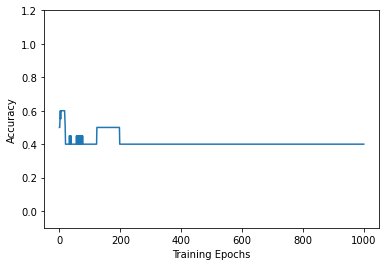

In [230]:
#Plot accuracy over epochs
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1000), accuracy)
plt.xlabel("Training Epochs")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()

In [231]:
print(accuracy)

[0.5, 0.5, 0.55, 0.6, 0.55, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.55, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.45, 0.4, 0.45, 0.4, 0.45, 0.45, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.45, 0.4, 0.45, 0.4, 0.45, 0.4, 0.45, 0.4, 0.45, 0.4, 0.45, 0.4, 0.45, 0.4, 0.45, 0.4, 0.4, 0.45, 0.4, 0.4, 0.45, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.

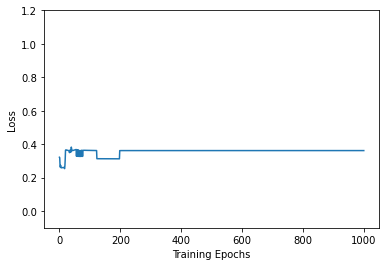

In [232]:
#Plot loss over epochs
plt.figure()
plt.plot(range(1000), loss)
plt.xlabel("Training Epochs")
plt.ylabel("Loss")
plt.ylim([-0.1, 1.2])
plt.show()

In [207]:
print(loss)

[0.33233277656826266, 0.31803011086466404, 0.31483143296553323, 0.3136561300742943, 0.3240876526054181, 0.36962011865814587, 0.3158409932406455, 0.32323577697565, 0.3178945358206134, 0.31897582647176426, 0.3700286078875579, 0.3708401923022502, 0.3722391717279757, 0.37304977670683803, 0.32249793158123363, 0.37562387484418, 0.372677989126859, 0.4221841503736418, 0.4277765221784843, 0.33901234118857837, 0.3625290455207702, 0.36833438540429697, 0.3759788796491189, 0.323374694431383, 0.38841991840998075, 0.3295124766317784, 0.34018409064313193, 0.39069789094400015, 0.41364645053523175, 0.380698911342145, 0.32735131701422787, 0.3906417374143897, 0.40214423059577264, 0.5260454382771708, 0.5189051930935864, 0.5130479796533238, 0.4897350487764475, 0.5162665937513424, 0.535727337989653, 0.5576450040958507, 0.556483780057543, 0.5355912264840004, 0.34367505188682246, 0.4688973966435289, 0.4302309086422909, 0.43043565337160833, 0.35899786914499143, 0.3954422636414886, 0.3951726355020154, 0.39507776